## Import the required packages

In [1]:
# import required packages
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import pandas as pd

from sympy import *
import itertools
from sklearn.metrics import r2_score

# the packages for EIS ECMs analysis
import impedance
from impedance import preprocessing
from impedance.validation import linKK

# the packages for visualization
import cv2
from PIL import Image
import re

# the packages for peak fitting
import glob
import os
from os.path import basename
from scipy.optimize import curve_fit
import sys

# the packages for bayesian inference
import arviz as az
import numpyro
from numpyro.diagnostics import hpdi
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS,HMC,HMCECS,BarkerMH,HMCGibbs,DiscreteHMCGibbs

from numpyro.infer import Predictive
from numpyro.infer.util import log_likelihood,log_density

from IPython.display import set_matplotlib_formats
import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.special import logsumexp
import jax

import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow_probability.substrates.jax.mcmc import kernel as kernel_base
from tensorflow_probability.python.internal.backend.jax.compat import v2 as tf
import tensorflow_probability as tfp; tfp = tfp.substrates.jax

# the package for storage
import dill

# the package for ignoring warnings
import warnings


In [153]:
from julia import Julia
j = Julia(runtime=r"D:\Julia-1.7.2\bin\julia.exe")

In [ ]:
# ignore the warning
warnings.filterwarnings('ignore')

In [2]:
# set the parameters for plots
plt.rcParams['figure.figsize']=(19.6, 10.8)

In [ ]:
# set the parameters for plots
az.style.use("arviz-darkgrid")

### pre-set some default parameters for plotting

In [ ]:
# 1) load data
# 2) load impedance/freq/reals/imags
# 3)

In [ ]:
# input board
# input 1: data_path
# input 2: impedance/freq or reals/imags/impedance

In [128]:
df = load_data("Robert/rbnb3p41_Test_2_Char_GEIS_13_raw.json")

In [130]:
data_path = "Robert/rbnb3p41_Test_2_Char_GEIS_13_raw.json"

In [131]:
data_processed

,freq,Zreal,Zimag
0,24539.100000,18.796270,0.013955
1,19414.100000,18.799422,-0.038605
2,15359.400000,18.801284,-0.033803
3,12156.200000,18.808843,-0.069816
4,9617.190000,18.828549,-0.099991
5,7611.220000,18.843851,-0.123049
6,6018.210000,18.859638,-0.152709
7,4762.620000,18.872379,-0.164367
8,3771.030000,18.893537,-0.203605
9,2984.770000,18.945561,-0.223879


In [155]:
def ECMs_fitting(impedance,freq):
    # preprocessing + store preprocessed data
    data_path = "Robert/rbnb3p41_Test_2_Char_GEIS_13_raw.json"
    data_processed,ohmic_resistance = preprocessing(impedance,freq,0.05)
    path_data_preprocessed = save_processed_data()
    
    # call julia program
    run_julia = j.include('test_julia.jl')
    
    # load the results
    path_results = "df_results.csv"
    df_circuits = load_results(file_path = path_results)
    df_circuits = split_components(df_circuits)
    df_circuits = capacitance_filter(df_circuits)
    df_circuits = ohmic_resistance_filter(df_circuits)
    df_circuits = generate_mathematical_expression(df_circuits)
    new_df = combine_expression(df_circuits)
    new_df = calculate_length(new_df)
    new_df = split_variables(new_df)
    results = Bayesian_inference(df = new_df)
    return results

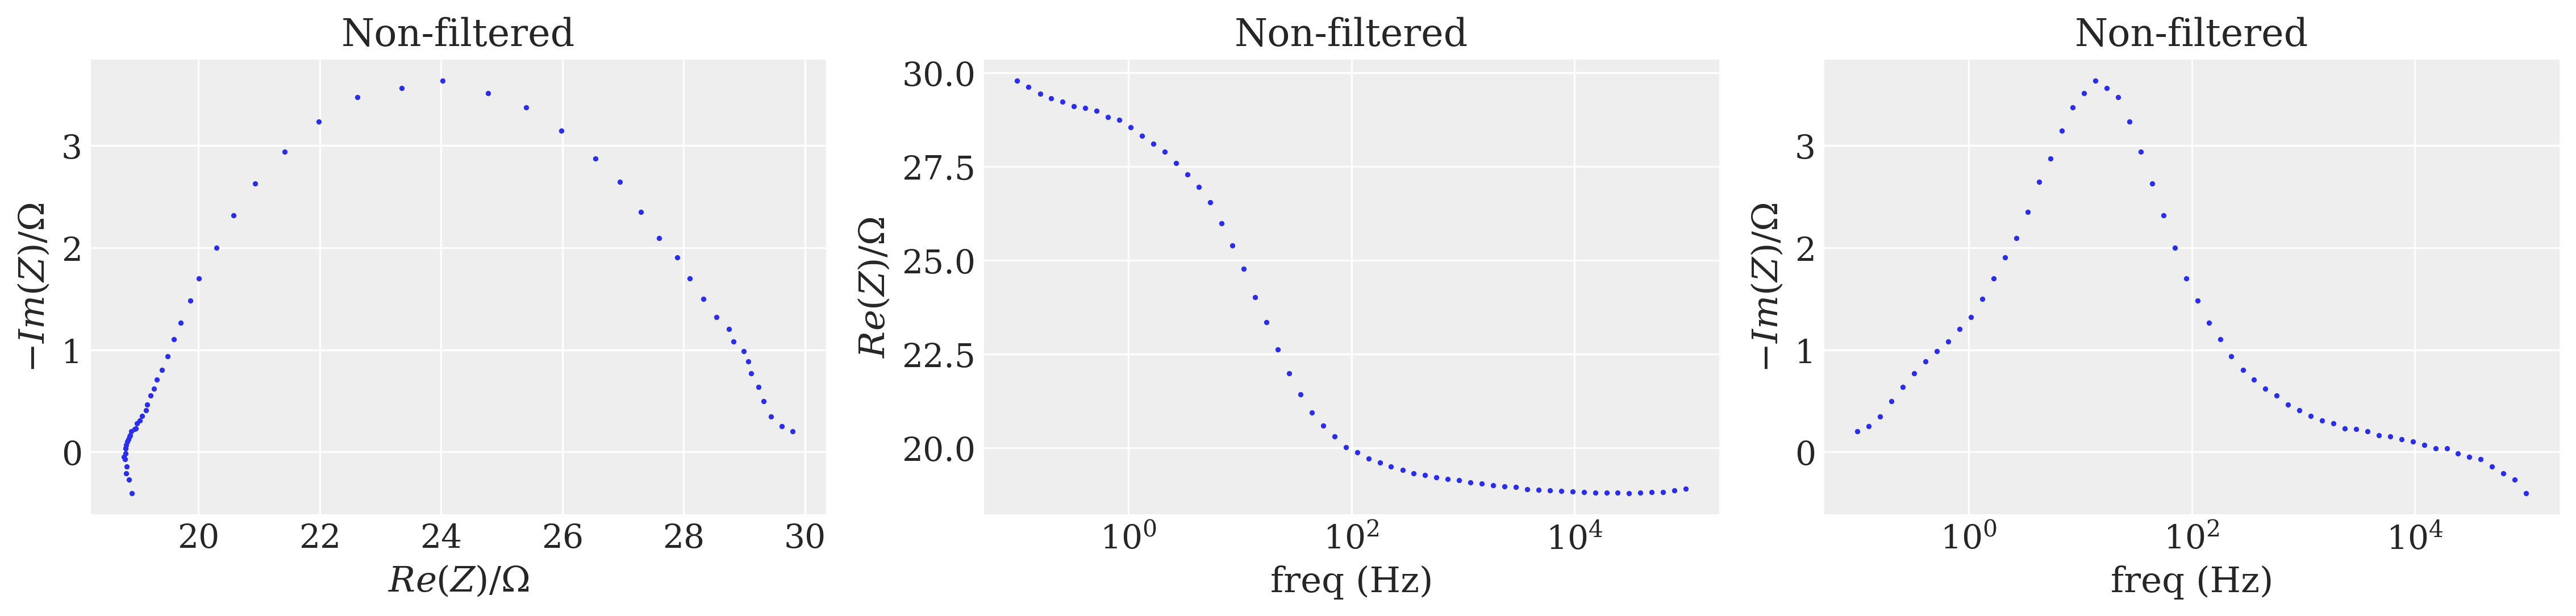

10 0.9944793678045115 0.06683768209951693
20 0.7230520264049358 0.033090223592298976


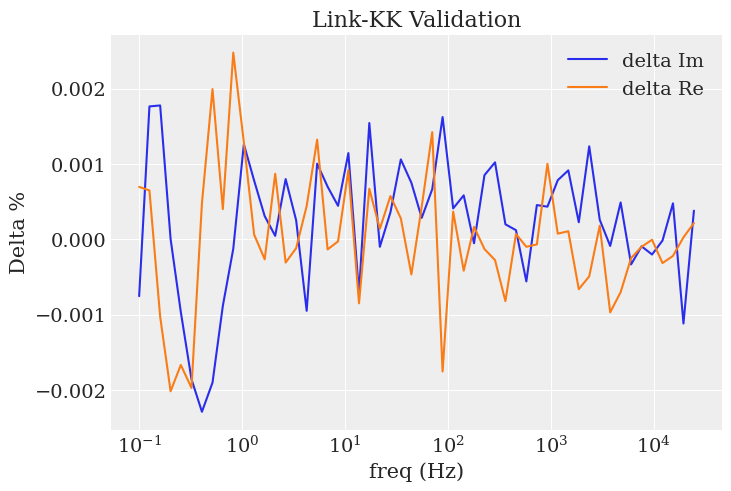

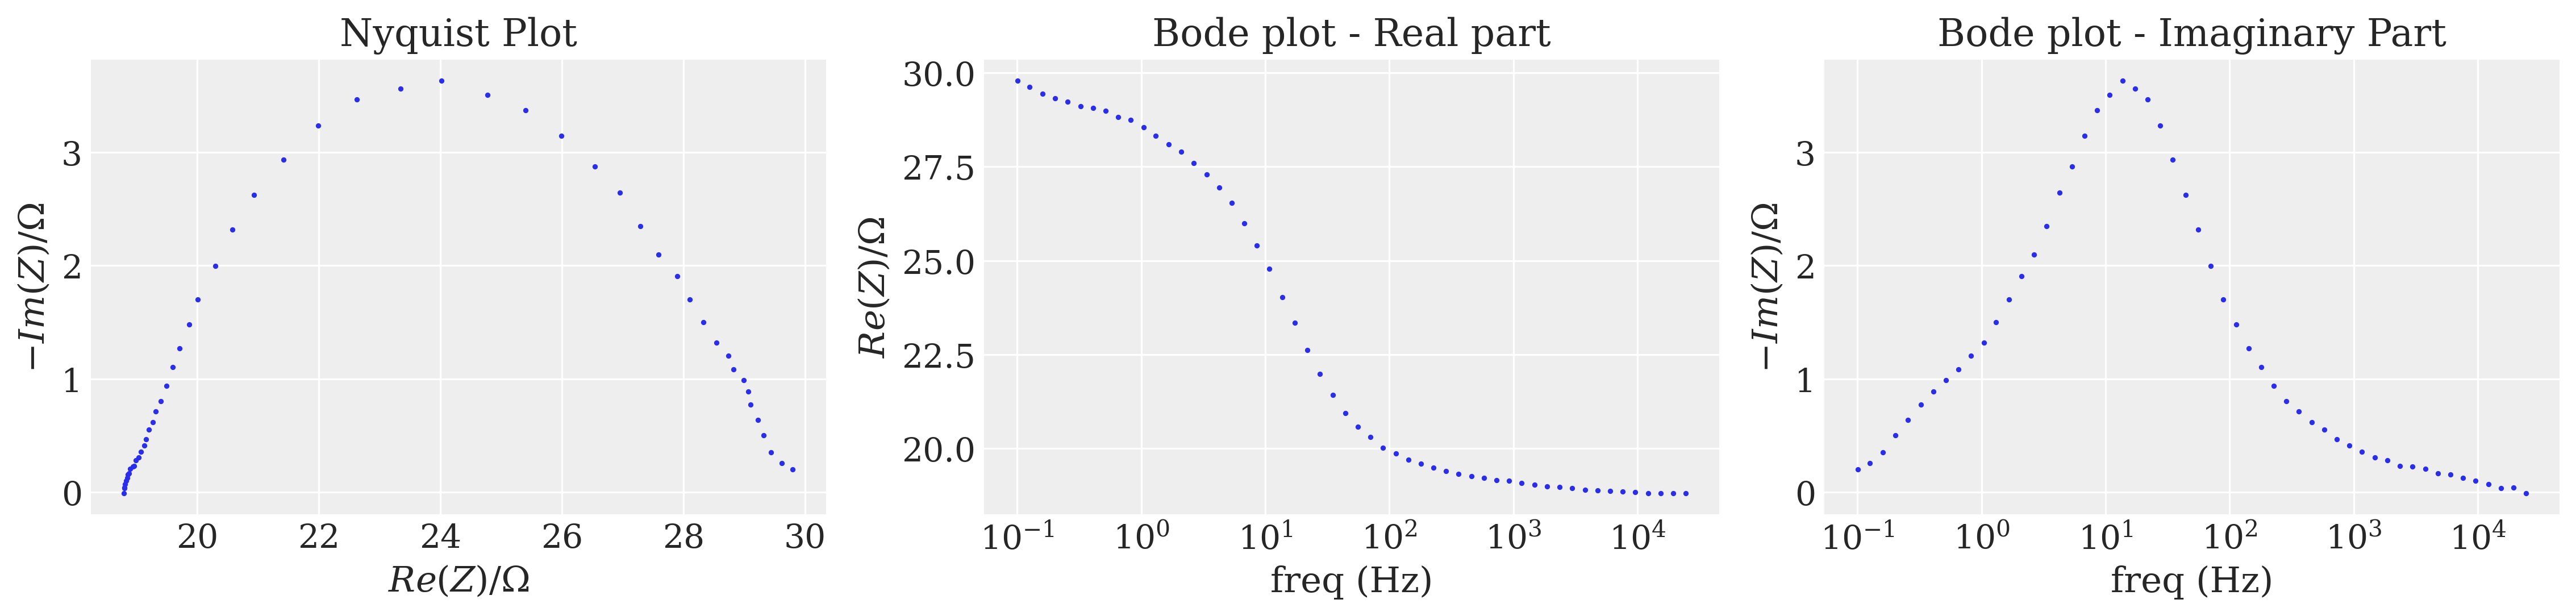

In [ ]:
results = ECMs_fitting(impedance=measurements,freq=frequencies)

## Load the EIS data

In [ ]:
# input board: 
# impedance / freq/ data_path

In [3]:
def load_data(data_path):
    data = data_path
    f = open(data)
    if data.endswith(".json"):
        data = json.load(f)
        df = pd.DataFrame(data)
    elif data.endswith(".csv"):
        df = pd.read_csv(f)
    elif data.endswith(".txt"):
        with open("data", "r", encoding="utf-8") as f:
            data = f.read().splitlines()
        # ! modification required
    elif data.endswith(".xlsx"):
        df = pd.read_excel(data)
    return df

In [4]:
def plot_EIS(freq,impedance = "",reals = "",imags = ""):
# 最后定义一个/ style = "default"/ BODE图需要phase

    if impedance != "":
        reals = impedance.real
        imags = impedance.imag
    
    #Set plotting parameters for the non-filtered data
    fig,axes = plt.subplots(1,3,figsize=(15,3.5),dpi=300)

    axes[0].scatter(reals,-imags,s=1.5)
    axes[0].set_xlabel(r'$Re(Z) / \Omega$')
    axes[0].set_ylabel(r'$-Im(Z) / \Omega$')
    axes[0].set_title('Nyquist plot')
    
    axes[1].scatter(freq,reals,s=1.5)
    axes[1].set_xscale('log')
    axes[1].set_xlabel('freq (Hz)')
    axes[1].set_ylabel(r'$Re(Z) / \Omega$')
    axes[1].set_title('Bode plot - real part')
    
    axes[2].scatter(freq,-imags,s=1.5)
    axes[2].set_xscale('log')
    axes[2].set_ylabel(r'$-Im(Z) / \Omega$')
    axes[2].set_xlabel('freq (Hz)')
    axes[2].set_title('Bode plot - imaginary part')
    plt.show()

#### Input : reak/imag/impedance are required

In [17]:
# For Robert's Data:
data = "rbnb3p8_Test_4_Char_GEIS_9_raw.json"
f = open(data)
data = json.load(f)

In [18]:
df = pd.DataFrame(data)
df

,GEIS
Ece,"[-0.268477, -0.269202, -0.269639, -0.26984, -0..."
Ece_bar,"[-2147483648.0, -536870912.0, 1073741824.0, -2..."
Ewe,"[1.58075, 1.59453, 1.59925, 1.60055, 1.6013, 1..."
Ewe_bar,"[0.00123485, 0.00122957, 0.00123855, 0.0009437..."
I,"[0.000702716, 0.000702849, 0.00070282, 0.00070..."
I_bar,"[6.62439e-05, 6.6714e-05, 6.79687e-05, 5.11851..."
Ice_bar,"[6.62384e-05, 6.67107e-05, 6.79665e-05, 5.1184..."
freq,"[100016.0, 79125.0, 62601.6, 49539.1, 39195.3,..."
meta,"[Tue Jan 4 14:24:10 2022, Sequence time = 118..."
phase_Zce,"[0.0493015, 0.00483781, -0.0222723, -0.0498514..."


In [5]:
# For Parisa's Data
data = pd.read_excel("Parisa_2022-01-28-MEA #3_02_PEIS_C01.xlsx")

In [6]:
new_col = ['freq/Hz', 'Re(Z)/Ohm',"=-@Im(Z)/@Ohm" , '|Z|/Ohm',"Phase(Z)/deg","time/s","<Ewe>/V","<I>/mA","Cs/µF", "Cp/µF","cycle number","I Range","|Ewe|/V","|I|/A","Ns","(Q-Qo)/mA.h","Re(Y)/Ohm-1","Im(Y)/Ohm-1","|Y|/Ohm-1","Phase(Y)/deg","dq/mA.h"]
data.columns = new_col
data[62:132]

,freq/Hz,Re(Z)/Ohm,=-@Im(Z)/@Ohm,|Z|/Ohm,Phase(Z)/deg,time/s,<Ewe>/V,<I>/mA,Cs/µF,Cp/µF,...,I Range,|Ewe|/V,|I|/A,Ns,(Q-Qo)/mA.h,Re(Y)/Ohm-1,Im(Y)/Ohm-1,|Y|/Ohm-1,Phase(Y)/deg,dq/mA.h
62,1.00002e+06,0.671438,-3.174957,3.24518,78.0591,2948.18,-3.00026,-374.248,-0.0501273,-0.0479814,...,7,6.42706e-05,1.9805e-05,0,-45259.4,0.0637572,-0.301482,0.308149,-78.0591,-45259.4
63,791679,2.5599,-0.638218,2.63826,13.9992,2948.63,-3.00078,-376.371,-0.314994,-0.0184334,...,7,4.01364e-05,1.52132e-05,0,-45259.5,0.36778,-0.0916925,0.379038,-13.9992,-0.0475503
64,626763,-0.195147,-1.190079,1.20597,99.3124,2949.09,-3.00092,-377.417,-0.213374,-0.207787,...,7,5.23888e-05,4.34411e-05,0,-45259.5,-0.13418,-0.818278,0.829206,-99.3124,-0.0476673
65,496196,-0.100336,-0.696363,0.703554,98.1991,2949.81,-3.00097,-378.382,-0.460608,-0.45124,...,7,0.000209579,0.000297886,0,-45259.6,-0.202704,-1.40683,1.42135,-98.1991,-0.0773206
66,392824,0.066372,-0.545445,0.549468,83.0621,2950.25,-3.00097,-378.765,-0.742799,-0.731961,...,7,0.000560614,0.00102028,0,-45259.6,0.219836,-1.80661,1.81994,-83.0621,-0.0462676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.254711,0.915332,-0.049881,0.91669,3.11924,3010.24,-3.00119,-378.933,-12526740,-37090.4,...,7,0.0106993,0.0116717,0,-45265.9,1.08926,-0.0593593,1.09088,-3.11924,-0.870825
128,0.201707,0.909568,-0.055304,0.911248,3.47945,3020.7,-3.00118,-379.127,-14267344,-52551.4,...,7,0.0107021,0.0117444,0,-45267,1.09537,-0.0666015,1.0974,-3.47945,-1.09952
129,0.159595,0.891954,-0.059271,0.893921,3.80177,3033.91,-3.00118,-379.169,-16825078,-73968.3,...,7,0.0107019,0.0119718,0,-45268.4,1.11621,-0.0741729,1.11867,-3.80177,-1.39035
130,0.126203,0.881463,-0.063935,0.883779,4.14859,3050.6,-3.00118,-379.065,-19724558,-103229,...,7,0.0107009,0.0121081,0,-45270.2,1.12854,-0.0818568,1.1315,-4.14859,-1.75847


## For Jae's new data

In [56]:
data = pd.read_table("10ks.CTRL3-2.Deb.0.1MH2SO4.R1.SP200cart1_06_PEIS_C01.txt")
data

,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg,time/s,<Ewe>/V,<I>/mA,Unnamed: 8
0,200019.480000,1.304171e+02,3.468001e+01,1.349493e+02,-14.891262,10602.358770,-0.040436,-0.000995,NaN
1,149716.770000,1.341570e+02,2.727420e+01,1.369014e+02,-11.491652,10602.733761,-0.040460,-0.000747,NaN
2,112070.290000,1.364035e+02,2.157776e+01,1.380997e+02,-8.989165,10603.232750,-0.040456,-0.000728,NaN
3,83886.695000,1.377822e+02,1.727571e+01,1.388611e+02,-7.146687,10603.607774,-0.040450,-0.000785,NaN
4,62792.953000,1.385546e+02,1.434104e+01,1.392948e+02,-5.909335,10603.981767,-0.040452,-0.000817,NaN
...,...,...,...,...,...,...,...,...,...
62,0.003185,3.891231e+06,1.812847e+06,4.292796e+06,-24.979877,14375.134820,-0.040596,0.000014,NaN
63,0.002385,4.124008e+06,1.907837e+06,4.543928e+06,-24.826071,15634.709475,-0.040596,0.000012,NaN
64,0.001785,4.443237e+06,2.000512e+06,4.872823e+06,-24.239067,17317.803800,-0.040598,0.000011,NaN
65,0.001336,4.779632e+06,2.148920e+06,5.240490e+06,-24.208651,19566.115223,-0.040601,0.000009,NaN


In [60]:
# second new data
data = pd.read_table("Deb.01.24.22.CCA.6.2.0.1MH2SO4.1um.R2.10ks_06_PEIS_C02.txt")
data

,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg,time/s,<Ewe>/V,<I>/mA,Unnamed: 8
0,100003.710000,1.954029e+02,6.455104e+01,2.057891e+02,-18.280890,10696.826563,-0.039343,0.000000,NaN
1,74645.563000,2.027341e+02,5.085654e+01,2.090155e+02,-14.082256,10697.917557,-0.039345,0.002613,NaN
2,55726.691000,2.071093e+02,4.018244e+01,2.109713e+02,-10.979865,10699.009540,-0.039352,0.002649,NaN
3,41595.535000,2.097963e+02,3.232674e+01,2.122722e+02,-8.759605,10700.101550,-0.039332,0.002637,NaN
4,31045.877000,2.115476e+02,2.698347e+01,2.132615e+02,-7.268982,10701.192555,-0.039337,0.002611,NaN
...,...,...,...,...,...,...,...,...,...
59,0.003221,5.792322e+06,4.348624e+06,7.243032e+06,-36.897629,18285.377649,-0.039441,0.000005,NaN
60,0.002405,6.661180e+06,4.780231e+06,8.198898e+06,-35.664173,20843.947612,-0.039441,0.000005,NaN
61,0.001795,7.712384e+06,5.312222e+06,9.364858e+06,-34.558727,24271.402445,-0.039439,0.000004,NaN
62,0.001340,8.896456e+06,5.940848e+06,1.069769e+07,-33.734085,28862.743758,-0.039418,0.000004,NaN


In [5]:
# Robert's new data
data = "Robert/rbnb3p41_Test_2_Char_GEIS_13_raw.json"
f = open(data)
data = json.load(f)

In [5]:
# Robert's 10min new data
data = "Robert/rbnb3p27_Test_3_Char_GEIS_13_raw.json"
f = open(data)
data = json.load(f)

In [6]:
df = pd.DataFrame(data)
df

,GEIS
Ece,"[-0.285507, -0.286842, -0.287604, -0.288115, -..."
Ece_bar,"[-2147483648.0, 1073741824.0, -1073741824.0, -..."
Ewe,"[1.72641, 1.73052, 1.73213, 1.73297, 1.7335, 1..."
Ewe_bar,"[0.0062175, 0.00628039, 0.0063332, 0.00639392,..."
I,"[0.00350346, 0.00350335, 0.00350358, 0.0035035..."
I_bar,"[0.000328843, 0.000333057, 0.000336728, 0.0003..."
Ice_bar,"[0.000328814, 0.000333039, 0.000336716, 0.0003..."
freq,"[100016.0, 79125.0, 62601.6, 49539.1, 39195.3,..."
meta,"[Fri Feb 18 12:44:51 2022, Sequence time = 62...."
phase_Zce,"[0.044113, 0.0234625, 0.0144614, -0.0089252, -..."


## Plot the original data

In [7]:
# For Robert's Data

abs_Ewe = df["GEIS"]["Ewe_bar"]
abs_I = df["GEIS"]["I_bar"]
Phase_Zwe = np.array(df["GEIS"]["phase_Zwe"])

abs_Z = np.divide(abs_Ewe, abs_I)
Re_Z = np.multiply(abs_Z, (np.cos(Phase_Zwe)))
Im_Z = np.multiply(abs_Z , (np.sin(Phase_Zwe)))

reals = Re_Z
imags = Im_Z
frequencies = np.array(df["GEIS"]["freq"])
measurements = reals + imags*1j

In [8]:
# For jae's new data
frequencies = np.array(data['freq/Hz'])
reals = np.array(data['Re(Z)/Ohm'])
imags = np.array(data['-Im(Z)/Ohm'])
Phase_Zwe = np.array(data['Phase(Z)/deg'])

measurements = reals + imags*1j

KeyError: 'freq/Hz'

## Pre-processing + kk validation (Robert Black contributed to this part.) + extract ohmic resistance

In [9]:
def find_ohmic_resistance(reals,imags):
    z = np.polyfit(reals,imags,5)
    fz = np.poly1d(z)
    x = symbols('x')
    ohmic_r_set = np.array(list(solveset(fz(x),x,domain=S.Reals)))
    pos = np.where(-imags >= 0 )
    index, = np.where(abs(imags[pos]) == abs(imags[pos]).min()) #finds minimum phase value, note returns as a tuple
    ohmic_resistance = ohmic_r_set[np.where(ohmic_r_set < reals[index])].max()
    return ohmic_resistance

In [10]:
def preprocessing(impedance,freq,threshold):
    
    # set plotting params and data directory
    tick_size = 9
    label_size = 11

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams["mathtext.fontset"] = "dejavuserif"
    plt.rcParams['xtick.labelsize'] = tick_size
    plt.rcParams['ytick.labelsize'] = tick_size
    plt.rcParams['axes.labelsize'] = label_size
    plt.rcParams['legend.fontsize'] = tick_size - 1
    
    # load the data
    Re_Z = impedance.real
    Im_Z = impedance.imag
    
    # Set plotting parameters for the non-filtered data
    fig,axes = plt.subplots(1,3,figsize=(15,3.5),dpi=300)
    
    # Plot the non-filtered plots
    axes[0].scatter(Re_Z,-Im_Z,s=1.5)
    axes[0].set_xlabel(r'$Re(Z) / \Omega$')
    axes[0].set_ylabel(r'$-Im(Z) / \Omega$')
    axes[0].set_title('Non-filtered')
    axes[1].scatter(freq,Re_Z,s=1.5)
    axes[1].set_xscale('log')
    axes[1].set_xlabel('freq (Hz)')
    axes[1].set_ylabel(r'$Re(Z) / \Omega$')
    axes[1].set_title('Non-filtered')
    axes[2].scatter(freq,-Im_Z,s=1.5)
    axes[2].set_xscale('log')
    axes[2].set_ylabel(r'$-Im(Z) / \Omega$')
    axes[2].set_xlabel('freq (Hz)')
    axes[2].set_title('Non-filtered')
    plt.show()

    ### FILTER 1 - High Frequency Region
    ### Find index where phase_Zwe == minimum, remove all high frequency values below zero
    # find index: 1khz - 100khz
    
    pos = np.where((1000<= frequencies)&(frequencies<= 1000000))
    index, = np.where(abs(Im_Z[pos]) == abs(Im_Z[pos]).min()) #finds minimum phase value, note returns as a tuple
    mask_phase = [True]*len(Im_Z)
    for i in range(len(Im_Z)):
        if i < index:
            mask_phase[i] = False

    freq = freq[index[0]:]
    Z = impedance[index[0]:]
    Re_Z = Re_Z[index[0]:]
    Im_Z = Im_Z[index[0]:]
    
        
    ### FILTER 2 - Low Frequency Region
    ### Lin-KK data validation to remove 'noisy' data
    ### For Lin-KK, the residuals of Re(Z) and Im(Z) are what will be used as a filter. I have found based on the data set that
    ### somewhere ~0.05% works the best
    M, mu, Z_linKK, res_real, res_imag = linKK(freq, Z, c=.5, max_M=100, fit_type='complex', add_cap=True)

    # Plot residuals of Lin-KK for visualization purposes. 
    plt.plot(freq, res_imag, label = 'delta Im')
    plt.plot(freq, res_real, label = 'delta Re')
    plt.xlabel('freq (Hz)')
    plt.ylabel('Delta %')
    plt.xscale('log')
    plt.title('Link-KK Validation')
    plt.legend()
    
    # Need to set a threshold limit for when to filter out the noisy data of the residuals
    # threshold = 0.05 # USER DEFINE!!!

    mask = [False]*(len(res_imag))
    for i in range(len(res_imag)):
        if res_imag[i] < threshold:
            mask[i] = True
        else:
            break

    freq_mask = freq[mask]
    Z_mask = Z[mask]
    Re_Z_mask = Re_Z[mask]
    Im_Z_mask = Im_Z[mask]
    
    # find the ohmic resistance
    ohmic_resistance = find_ohmic_resistance(Re_Z_mask,Im_Z_mask)
    
    #Putting into a dataframe for use with plotting and program
    values_mask = np.array([freq_mask,Re_Z_mask,Im_Z_mask])
    labels = ['freq','Zreal','Zimag']
    Zdf_mask = pd.DataFrame(values_mask.transpose(), columns = labels)
    
    # Plot the data to see how the filter performed
    fig,axes = plt.subplots(1,3,figsize=(15,3.5),dpi=300)
    axes[0].scatter(Zdf_mask['Zreal'].values,-Zdf_mask['Zimag'].values,s=1.5)
    if index == 0:
        axes[0].scatter(Re_Z_mask, fz(Re_Z_mask),s=1.5,c='r')
    axes[0].set_xlabel(r'$Re(Z) / \Omega$')
    axes[0].set_ylabel(r'$-Im(Z) / \Omega$')
    axes[0].set_title('Nyquist Plot')
    axes[1].scatter(Zdf_mask['freq'].values,Zdf_mask['Zreal'].values,s=1.5)
    axes[1].set_xscale('log')
    axes[1].set_xlabel('freq (Hz)')
    axes[1].set_ylabel(r'$Re(Z) / \Omega$')
    axes[1].set_title('Bode plot - Real part')
    axes[2].scatter(Zdf_mask['freq'].values,-Zdf_mask['Zimag'].values,s=1.5)
    axes[2].set_xscale('log')
    axes[2].set_ylabel(r'$-Im(Z) / \Omega$')
    axes[2].set_xlabel('freq (Hz)')
    axes[2].set_title('Bode plot - Imaginary Part')
    plt.show()
    
    return Zdf_mask,ohmic_resistance


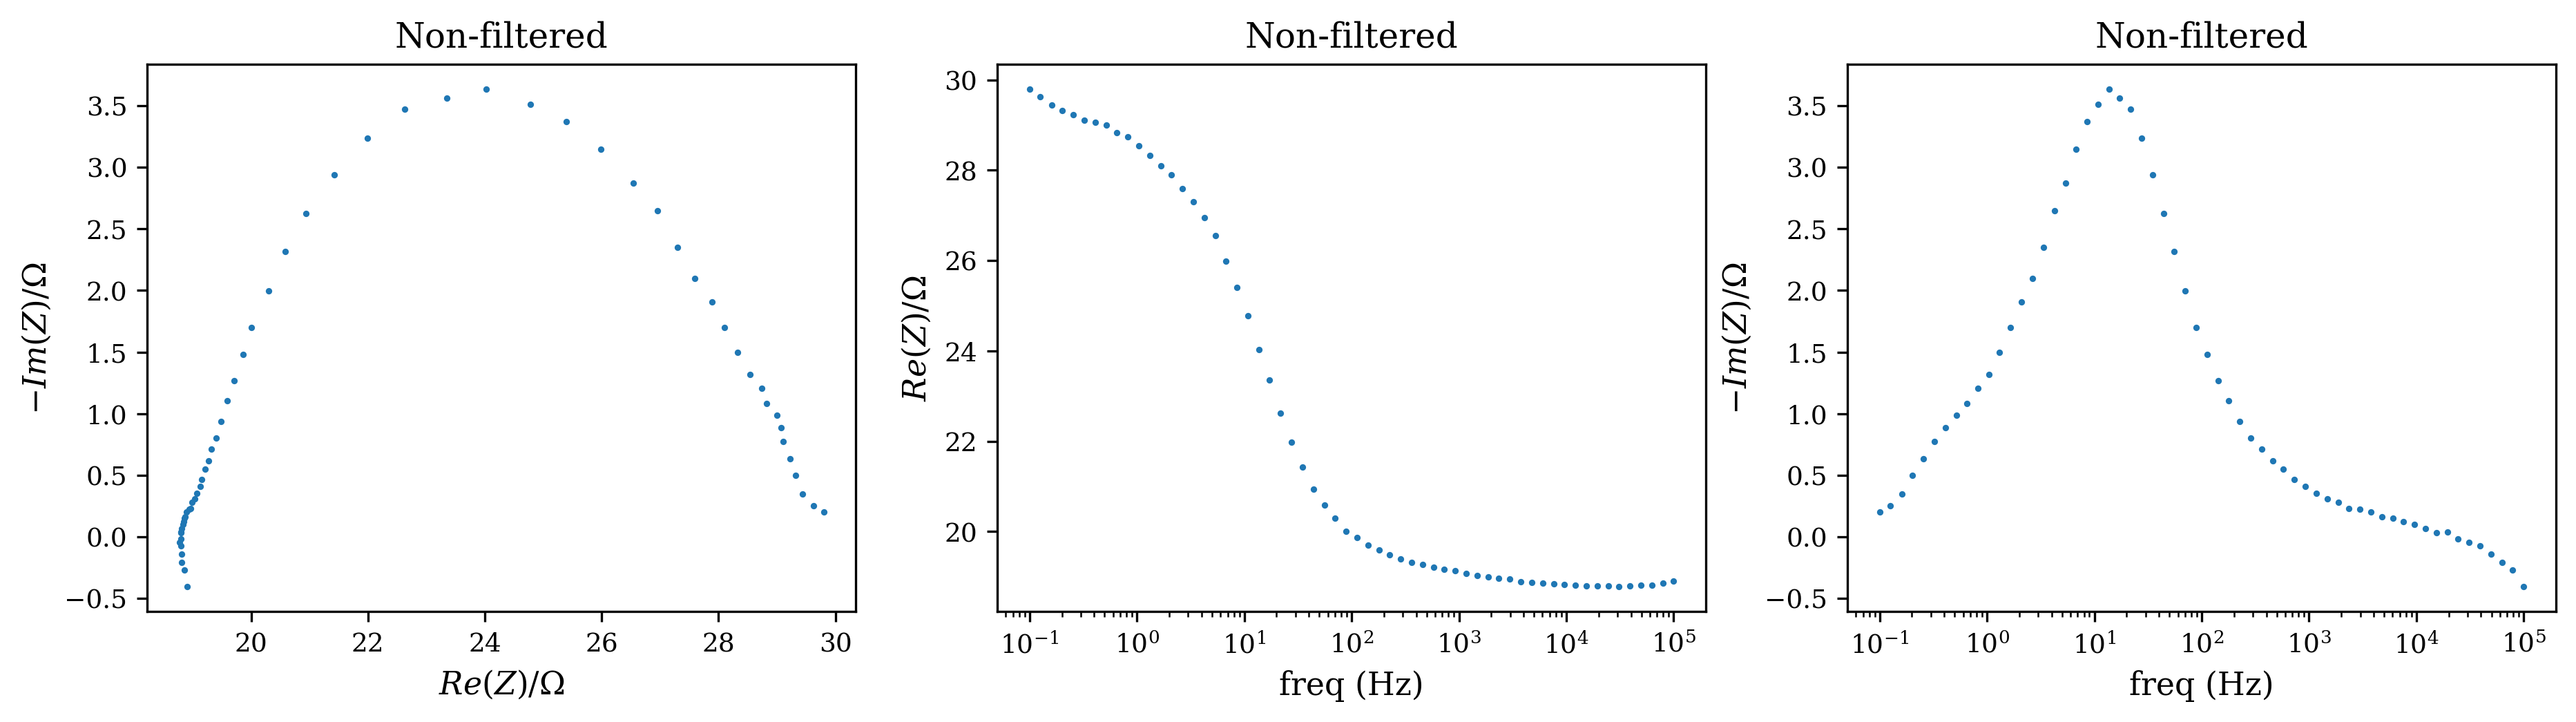

10 0.9944793678045115 0.06683768209951693
20 0.7230520264049358 0.033090223592298976


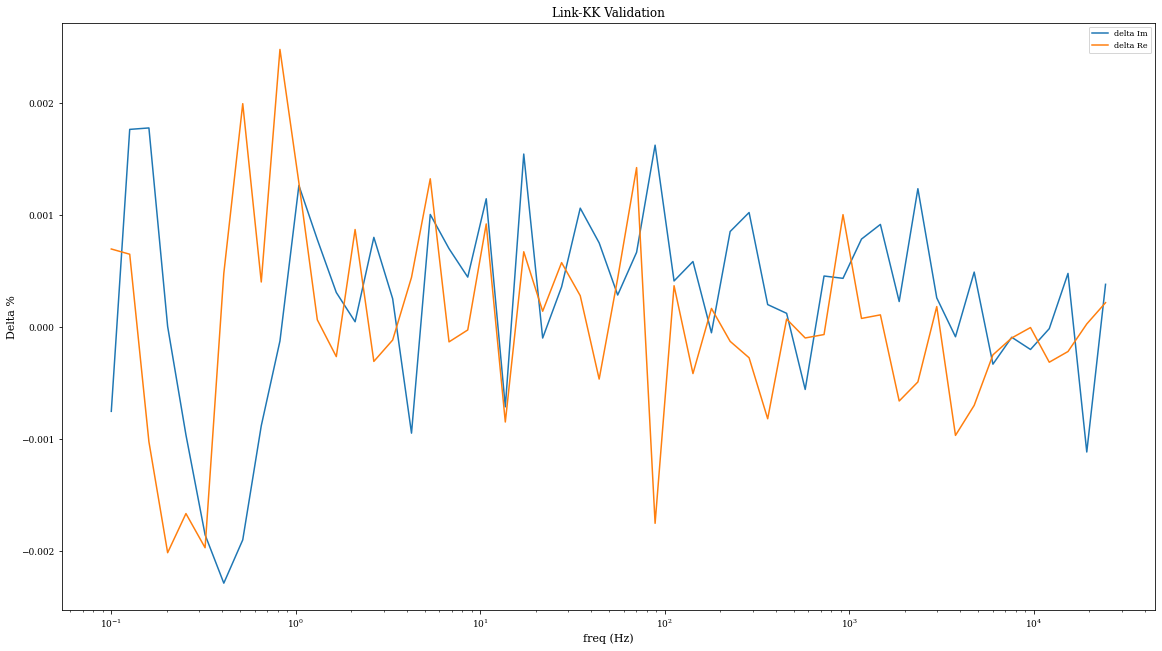

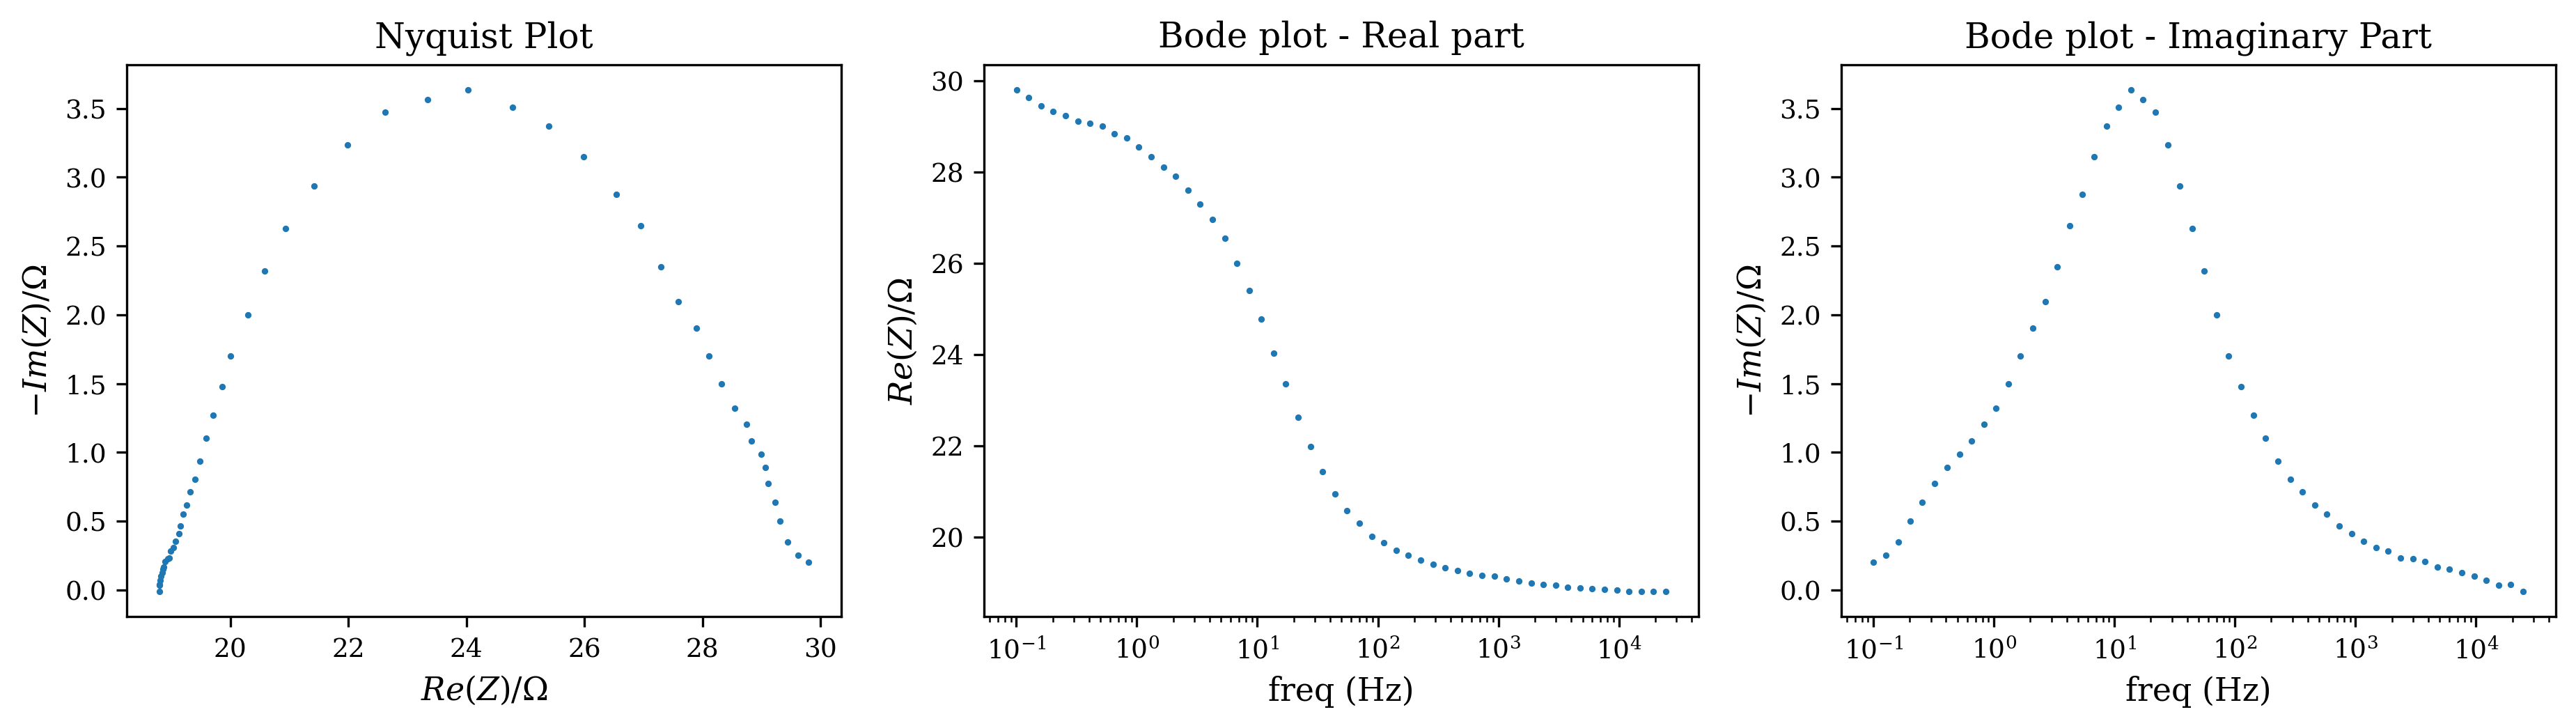

In [11]:
data_processed,ohmic_resistance = preprocessing(measurements,frequencies,0.05)

In [49]:
data_path = "Robert/rbnb3p41_Test_2_Char_GEIS_13.json"

In [134]:
def save_processed_data(input_name = data_path, data_stored = data_processed):
    if input_name.endswith(".json"):
        file_name = input_name.split(".json")[0]
    elif input_name.endswith(".csv"):
        file_name = input_name.split(".csv")[0]
    elif input_name.endswith(".txt"):
        file_name = input_name.split(".txt")[0]
    elif data.endswith(".xlsx"):
        file_name = input_name.split(".xlsx")[0]
    data_stored.to_csv(file_name+".csv",header = None,index=False)
    data_stored.to_csv('temp'+".csv",header = None,index=False)
    return file_name + ".csv"

In [51]:
path_data_preprocessed = save_processed_data()

In [37]:
data_processed

,freq,Zreal,Zimag
0,24539.100000,18.796270,0.013955
1,19414.100000,18.799422,-0.038605
2,15359.400000,18.801284,-0.033803
3,12156.200000,18.808843,-0.069816
4,9617.190000,18.828549,-0.099991
5,7611.220000,18.843851,-0.123049
6,6018.210000,18.859638,-0.152709
7,4762.620000,18.872379,-0.164367
8,3771.030000,18.893537,-0.203605
9,2984.770000,18.945561,-0.223879


In [38]:
ohmic_resistance

18.7982833347922

#### 问robert五种情况要怎么处理

#### 低频数据点还是没那么对吧,有没有什么further clean可以做

## Call Julia Program

In [27]:
from julia import Julia
jl = Julia(runtime=r"D:\Julia-1.7.2\bin\julia.exe")
n = jl.include('testtest.jl')

## Load the results

In [12]:
def load_results(file_path = path_results):
    df_circuits = pd.read_csv(file_path)
    return df_circuits

NameError: name 'path_results' is not defined

In [13]:
# load Robert's new data
file_path = "Robert_10min_results.csv"
df_circuits = pd.read_csv(file_path)

In [14]:
def split_components(df_circuits):
    # define some regular expression pattern to separate each kind of elements
    resistor_p = re.compile(r'[R][0-9][a-z]? = [0-9]*\.[0-9]*')
    capacitor_p = re.compile(r'[C][0-9][a-z]? = [0-9]*\.[0-9]*')
    inductor_p = re.compile(r'[L][0-9][a-z]? = [0-9]*\.[0-9]*')
    CPE_p = re.compile(r'[P][0-9][a-z]? = [0-9]*\.[0-9]*')

    # initialize some lists to store the values of each kind of elements
    resistors_list = []
    capacitors_list = []
    inductors_list = []
    CPEs_list = []

    for i in range(len(df_circuits['Parameters'])):
        resistors = resistor_p.findall(df_circuits['Parameters'][i])
        capacitors = capacitor_p.findall(df_circuits['Parameters'][i])
        inductors = inductor_p.findall(df_circuits['Parameters'][i])
        CPEs = CPE_p.findall(df_circuits['Parameters'][i])

        resistors_list.append(resistors)
        capacitors_list.append(capacitors)
        inductors_list.append(inductors)
        CPEs_list.append(CPEs)

    df_circuits['Resistors'] = resistors_list
    df_circuits['Capacitors'] = capacitors_list
    df_circuits['Inductors'] = inductors_list
    df_circuits['CPEs'] = CPEs_list
    
    return df_circuits

In [15]:
df_circuits = split_components(df_circuits)

In [16]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"[R1,[C2,P3-R4]-P5-R6-L7-C8]","(R1 = 29.57726825136467, C2 = 0.00019729588661...","[R1 = 29.57726825136467, R4 = 0.77881117110906...","[C2 = 0.00019729588661661316, C8 = 0.000688045...",[L7 = 5.590782505411699],"[P3w = 460.73767857856336, P3n = 0.25985371394..."
1,"[[R1,L2]-[[P3,R4],R5],R6]","(R1 = 35.216159662850195, L2 = 2.2223476965753...","[R1 = 35.216159662850195, R4 = 6.4290578696040...",[],[L2 = 2.2223476965753757],"[P3w = 1228.508658914695, P3n = 0.775271389196..."
2,"[C1,P2]-P3","(C1 = 0.0012444665976764782, P2w = 8.728024513...",[],[C1 = 0.0012444665976764782],[],"[P2w = 8.728024513271187, P2n = 0.041920055197..."
3,"[C1,R2]-P3","(C1 = 0.0015988063996364796, R2 = 7.3757208906...",[R2 = 7.375720890631431],[C1 = 0.0015988063996364796],[],"[P3w = 21.664461173074407, P3n = 0.01333609136..."
4,"[C1,[L2-R3,[C4,P5]]]-R6","(C1 = 1.153699537062916e-5, L2 = 0.00026077466...","[R3 = 10.58094481731882, R6 = 18.87083098907853]","[C1 = 1.153699537062916, C4 = 2.4550861026578314]",[L2 = 0.00026077466892901816],"[P5w = 280.09485283222097, P5n = 0.74689971819..."
...,...,...,...,...,...,...
95,"[R1,C2]-P3","(R1 = 7.375720859738312, C2 = 0.00159880640390...",[R1 = 7.375720859738312],[C2 = 0.0015988064039050307],[],"[P3w = 21.664461195066234, P3n = 0.01333609146..."
96,"[P1,P2]-R3","(P1w = 335.30609276094077, P1n = 0.77956218623...",[R3 = 18.899619414036476],[],[],"[P1w = 335.30609276094077, P1n = 0.77956218623..."
97,"[P1,L2]-[P3,C4]-[L5,R6]","(P1w = 2.352421652096722, P1n = 4.765615142789...",[R6 = 2.547318050281728],[C4 = 7.046376485040201],"[L2 = 0.0002862461472126606, L5 = 2.2498149511...","[P1w = 2.352421652096722, P1n = 4.765615142789..."
98,"[P1-R2,R3]","(P1w = 2175.8380188221363, P1n = 0.74947517737...","[R2 = 52.51011661386984, R3 = 29.448019305581177]",[],[],"[P1w = 2175.8380188221363, P1n = 0.74947517737..."


### Filtering results by capacitance

In [17]:
def capacitance_filter(df_circuits):
    # delete the circuits with any ideal capacitor
    for i in range(len(df_circuits['Capacitors'])):
        if df_circuits['Capacitors'][i] != []:
            df_circuits.drop([i],inplace = True)
    df_circuits.reset_index(drop=True,inplace=True)
    return df_circuits

In [18]:
df_circuits = capacitance_filter(df_circuits)

In [19]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"[[R1,L2]-[[P3,R4],R5],R6]","(R1 = 35.216159662850195, L2 = 2.2223476965753...","[R1 = 35.216159662850195, R4 = 6.4290578696040...",[],[L2 = 2.2223476965753757],"[P3w = 1228.508658914695, P3n = 0.775271389196..."
1,"[P1,P2-R3]","(P1w = 29.41519008558791, P1n = 0.005832529183...",[R3 = 59.31626277249879],[],[],"[P1w = 29.41519008558791, P1n = 0.005832529183..."
2,"R1-P2-[R3,P4]","(R1 = 18.389866456159737, P2w = 1.798633875408...","[R1 = 18.389866456159737, R3 = 9.260253717741854]",[],[],"[P2w = 1.7986338754088191, P2n = 0.12400975566..."
3,"[P1,R2]-R3","(P1w = 280.9018477711258, P1n = 0.749475178066...","[R2 = 10.580838993050735, R3 = 18.867180304401...",[],[],"[P1w = 280.9018477711258, P1n = 0.749475178066..."
4,"[P1-R2,P3-[L4,P5]]","(P1w = 3694.8527840555857, P1n = 0.82481195864...",[R2 = 62.09503952915538],[],[L4 = 3.621791313404637],"[P1w = 3694.8527840555857, P1n = 0.82481195864..."
5,"[P1,R2]-[R3,L4-R5]","(P1w = 280.90184918949126, P1n = 0.74947517929...","[R2 = 10.580838990674046, R3 = 5.5415581332085...",[],[L4 = 2.6380918730476406],"[P1w = 280.90184918949126, P1n = 0.74947517929..."
6,"[L1,P2]-[R3,P4]-R5","(L1 = 0.0021359068310348507, P2w = 1.415049408...","[R3 = 12.1931774139408, R5 = 17.357420194519975]",[],[L1 = 0.0021359068310348507],"[P2w = 1.4150494083507275, P2n = 9.57022733449..."
7,"[P1,L2]-[P3,R4]-R5","(P1w = 1.415049414186448, P1n = 1.079685171706...","[R4 = 12.193177419091034, R5 = 17.357420187077...",[],[L2 = 0.0021359068283652058],"[P1w = 1.415049414186448, P1n = 1.079685171706..."
8,"[P1,L2]-R3-[P4,R5]","(P1w = 1.415049381848018, P1n = 1.362454659749...","[R3 = 17.357420228018377, R5 = 12.193177380143...",[],[L2 = 0.0021359067899576955],"[P1w = 1.415049381848018, P1n = 1.362454659749..."
9,"[R1,P2-R3]","(R1 = 29.448019308426648, P2w = 2175.838016890...","[R1 = 29.448019308426648, R3 = 52.51011663718606]",[],[],"[P2w = 2175.8380168909894, P2n = 0.74947517793..."


### Filtering results by ohmic resistance

In [20]:
def find_series_elements(circuit):
    series_circuit = []
    identifior = 0
    for i in range(len(circuit)):
        if circuit[i] == '[':
            identifior += 1
        if identifior == 0:
            series_circuit.append(circuit[i])
        if circuit[i] == ']':
            identifior -= 1
        # elif identifior != 0:
        #    index_list.append([False])
    series_circuit = ''.join(series_circuit)
    return series_circuit

In [21]:
def ohmic_resistance_filter(df_circuits):
    for i in range(len(df_circuits['Circuit'])):
        # find the series elements
        series_circuit = find_series_elements(circuit = df_circuits['Circuit'][i])
        # find the series resistors
        find_R = re.compile(r'R[0-9]')
        series_resistors = find_R.findall(series_circuit)
        # initiate a list to store series resistors' values for future comparison
        R_values_list = []
        for j in range(len(series_resistors)):
            value_R_p = re.compile(f'{series_resistors[j]} = [0-9]*\.[0-9]*')
            values_R_withid = value_R_p.findall(''.join(df_circuits['Resistors'][i]))
            value_R_p2 = re.compile(r'[0-9]*\.[0-9]*')
            for k in range(len(values_R_withid)):
                R_value = value_R_p2.findall(values_R_withid[k])
                R_values_list.append(R_value)
        if R_values_list == []:
            df_circuits.drop([i],inplace = True)
        else:
            value_identify_list = []
            for m in range(len(R_values_list)):
                if float(R_values_list[m][0]) < ohmic_resistance * 0.85 or float(R_values_list[m][0]) > ohmic_resistance * 1.15:
                    value_identify_list.append(False)
                else:
                    value_identify_list.append(True)
            if True not in value_identify_list:
                df_circuits.drop([i],inplace = True)

    df_circuits.reset_index(drop=True,inplace=True)
    return df_circuits

In [22]:
df_circuits = ohmic_resistance_filter(df_circuits)

In [25]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"R1-P2-[R3,P4]","(R1 = 18.389866456159737, P2w = 1.798633875408...","[R1 = 18.389866456159737, R3 = 9.260253717741854]",[],[],"[P2w = 1.7986338754088191, P2n = 0.12400975566..."
1,"[P1,R2]-R3","(P1w = 280.9018477711258, P1n = 0.749475178066...","[R2 = 10.580838993050735, R3 = 18.867180304401...",[],[],"[P1w = 280.9018477711258, P1n = 0.749475178066..."
2,"[L1,P2]-[R3,P4]-R5","(L1 = 0.0021359068310348507, P2w = 1.415049408...","[R3 = 12.1931774139408, R5 = 17.357420194519975]",[],[L1 = 0.0021359068310348507],"[P2w = 1.4150494083507275, P2n = 9.57022733449..."
3,"[P1,L2]-[P3,R4]-R5","(P1w = 1.415049414186448, P1n = 1.079685171706...","[R4 = 12.193177419091034, R5 = 17.357420187077...",[],[L2 = 0.0021359068283652058],"[P1w = 1.415049414186448, P1n = 1.079685171706..."
4,"[P1,L2]-R3-[P4,R5]","(P1w = 1.415049381848018, P1n = 1.362454659749...","[R3 = 17.357420228018377, R5 = 12.193177380143...",[],[L2 = 0.0021359067899576955],"[P1w = 1.415049381848018, P1n = 1.362454659749..."
5,"[R1,P2]-R3","(R1 = 10.58083898898906, P2w = 280.90184823867...","[R1 = 10.58083898898906, R3 = 18.86718030564013]",[],[],"[P2w = 280.90184823867696, P2n = 0.74947517843..."
6,"[R1,P2]-R3","(R1 = 10.580839009924702, P2w = 280.9018465719...","[R1 = 10.580839009924702, R3 = 18.867180301334...",[],[],"[P2w = 280.9018465719669, P2n = 0.749475177389..."
7,"[R1,P2]-R3","(R1 = 10.580838996527872, P2w = 280.9018479476...","[R1 = 10.580838996527872, R3 = 18.86718030448284]",[],[],"[P2w = 280.9018479476597, P2n = 0.749475178459..."
8,"[P1,R2]-R3","(P1w = 280.90184681433453, P1n = 0.74947517775...","[R2 = 10.580839002930198, R3 = 18.867180303407...",[],[],"[P1w = 280.90184681433453, P1n = 0.74947517775..."
9,"[R1,P2]-R3","(R1 = 10.580838989266997, P2w = 280.9018486808...","[R1 = 10.580838989266997, R3 = 18.86718030398173]",[],[],"[P2w = 280.9018486808596, P2n = 0.749475178679..."


## Generating mathematical expression

In [23]:
def generate_mathematical_expression(df_circuits):
    
    # define two kinds of pattern to find all elements in the circuit
    test_pattern = re.compile(r'([CLRP])([0-9])+')
    test_pattern_2 = re.compile(r'[CLRP][0-9]')
    
    # create a list to store the mathematical expressions
    new_circuits = []
    
    for i in range(len(df_circuits['Circuit'])):
        circuit = df_circuits['Circuit'][i]
        for j,k in zip(["-","[",",","]"],["+","((",")**(-1)+(",")**(-1))**(-1)"]):
            circuit = circuit.replace(j,k)
        test_results = test_pattern.findall(circuit)
        test_results_2 = test_pattern_2.findall(circuit)
        
        for m in range(len(test_results)):
            if test_results[m][0] == 'R':
                circuit = circuit.replace(test_results_2[m],"X")
            elif test_results[m][0] == 'C':
                circuit = circuit.replace(test_results_2[m],"(1/(2*1j*np.pi*F*X))")
            elif test_results[m][0] == 'L':
                circuit = circuit.replace(test_results_2[m],"(2*1j*np.pi*F*X)")
            elif test_results[m][0] == 'P':
                circuit = circuit.replace(test_results_2[m],"X*(2*np.pi*F)**(-Y)*(np.cos((np.pi*Y)*0.5)-np.sin((np.pi*X)*0.5)*1j)")
        
        new_temp_circuit = []
        counter = 0
        
        for n in range(len(circuit)):
            if circuit[n] == 'X':
                new_temp_circuit.append(f"X[{str(counter)}]")
                counter += 1
            elif circuit[n] == 'Y':
                new_temp_circuit.append(f"X[{str(counter)}]")
            else:
                new_temp_circuit.append(circuit[n])
        new_circuit = ''.join(new_temp_circuit)
        new_circuits.append(new_circuit)
        

    df_circuits['Mathematical expressions'] = new_circuits
    
    return df_circuits
 

In [24]:
df_circuits = generate_mathematical_expression(df_circuits)
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs,Mathematical expressions
0,"R1-P2-[R3,P4]","(R1 = 18.389866456159737, P2w = 1.798633875408...","[R1 = 18.389866456159737, R3 = 9.260253717741854]",[],[],"[P2w = 1.7986338754088191, P2n = 0.12400975566...",X[0]+X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np.pi*...
1,"[P1,R2]-R3","(P1w = 280.9018477711258, P1n = 0.749475178066...","[R2 = 10.580838993050735, R3 = 18.867180304401...",[],[],"[P1w = 280.9018477711258, P1n = 0.749475178066...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
2,"[L1,P2]-[R3,P4]-R5","(L1 = 0.0021359068310348507, P2w = 1.415049408...","[R3 = 12.1931774139408, R5 = 17.357420194519975]",[],[L1 = 0.0021359068310348507],"[P2w = 1.4150494083507275, P2n = 9.57022733449...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1]*(2*np.pi*F)...
3,"[P1,L2]-[P3,R4]-R5","(P1w = 1.415049414186448, P1n = 1.079685171706...","[R4 = 12.193177419091034, R5 = 17.357420187077...",[],[L2 = 0.0021359068283652058],"[P1w = 1.415049414186448, P1n = 1.079685171706...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
4,"[P1,L2]-R3-[P4,R5]","(P1w = 1.415049381848018, P1n = 1.362454659749...","[R3 = 17.357420228018377, R5 = 12.193177380143...",[],[L2 = 0.0021359067899576955],"[P1w = 1.415049381848018, P1n = 1.362454659749...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
5,"[R1,P2]-R3","(R1 = 10.58083898898906, P2w = 280.90184823867...","[R1 = 10.58083898898906, R3 = 18.86718030564013]",[],[],"[P2w = 280.90184823867696, P2n = 0.74947517843...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...
6,"[R1,P2]-R3","(R1 = 10.580839009924702, P2w = 280.9018465719...","[R1 = 10.580839009924702, R3 = 18.867180301334...",[],[],"[P2w = 280.9018465719669, P2n = 0.749475177389...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...
7,"[R1,P2]-R3","(R1 = 10.580838996527872, P2w = 280.9018479476...","[R1 = 10.580838996527872, R3 = 18.86718030448284]",[],[],"[P2w = 280.9018479476597, P2n = 0.749475178459...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...
8,"[P1,R2]-R3","(P1w = 280.90184681433453, P1n = 0.74947517775...","[R2 = 10.580839002930198, R3 = 18.867180303407...",[],[],"[P1w = 280.90184681433453, P1n = 0.74947517775...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
9,"[R1,P2]-R3","(R1 = 10.580838989266997, P2w = 280.9018486808...","[R1 = 10.580838989266997, R3 = 18.86718030398173]",[],[],"[P2w = 280.9018486808596, P2n = 0.749475178679...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...


## Extract the features of each circuit

In [25]:
# convert the circuit string to nparray
def s_to_a_convert(circuit):
    # delete the numbers included in str
    circuit = re.sub(r'[0-9]+', '', circuit)
    pat = re.compile(r'[RCLP\[\]\-,]')
    str = pat.findall(circuit)
    circuit_array = np.zeros((1,len(str)))
    for i in range(len(str)):
        # encoding rules: R=1，C=2，L=3，P=4，[=5,]=6,"-"=7,","=8
        if str[i] == "R":
            circuit_array[0,i] = 1
        elif str[i] == "C":
            circuit_array[0,i] = 2
        elif str[i] == "L":
            circuit_array[0,i] = 3
        elif str[i] == "P":
            circuit_array[0,i] = 4
        elif str[i] == "[":
            circuit_array[0,i] = 5
        elif str[i] == "]":
            circuit_array[0,i] = 6
        elif str[i] == "-":
            circuit_array[0,i] = 7
        elif str[i] == ",":
            circuit_array[0,i] = 8
    return circuit_array[0]

In [26]:
# define a function to count components numbers
def count_components(circuit,symbols = True):
    
    # define the pattern for each components (p denotes pattern)
    r_p = re.compile(r'[R]')
    c_p = re.compile(r'[C]')
    l_p = re.compile(r'[L]')
    p_p = re.compile(r'[P]')
    if symbols:
        b_p = re.compile(r'[\[\]]')
        d_p = re.compile(r'[\-]')
        comma_p = re.compile(r'[,]')
    
    # find the individual components (n denotes number)
    r_n = r_p.findall(circuit) 
    c_n = c_p.findall(circuit)
    l_n = l_p.findall(circuit)
    p_n = p_p.findall(circuit)
    if symbols:
        b_n = b_p.findall(circuit)
        d_n = d_p.findall(circuit)
        comma_n = comma_p.findall(circuit)
    
    # create array to store the numbers of components
    if symbols:
        array_components_numbers = np.zeros((1,7))
    else:
        array_components_numbers = np.zeros((1,4))
        
    # store the numbers of components into array
    array_components_numbers[0,0] = len(r_n)
    array_components_numbers[0,1] = len(c_n)
    array_components_numbers[0,2] = len(l_n)
    array_components_numbers[0,3] = len(p_n)
    if symbols:
        array_components_numbers[0,4] = len(b_n) # /2 can be used to find the number of separated parallel structure
        array_components_numbers[0,5] = len(d_n)
        array_components_numbers[0,6] = len(comma_n) # add this number with the number of separated parallel sturcture can get the number of subcircuits 
        
    return array_components_numbers[0]

In [27]:
def rank_the_structure(circuit_array):
    ranks_array = np.zeros([1,len(circuit_array)])
    ranker = 0
    for i in range(len(circuit_array)):
        if circuit_array[i] == 5:
            ranker += 1
            # -1: [
            ranks_array[0,i]= -1 
        # elif circuit_array[i] == 8:
        #    ranker += 0.5
        #    ranks_store[0,i] = -3
            # -3: ,
        elif circuit_array[i] == 6:
            ranker -= 1
            ranks_array[0,i] = -2
        else:
            ranks_array[0,i] = ranker
    return ranks_array[0]

In [28]:
def structure_deconstructor(ranks_array):
    # initialize an array to store 0_level series structure
    # lvl_0 = np.zeros
    # initialize a list to store the indexs 
    indexs_list = []
    # initialize a list to store the index lists
    indexs_lists = []
    for i in range(len(ranks_array)):
        if ranks_array[i] < 0:
            indexs_lists.append(indexs_list)
            indexs_list = []
        elif ranks_array[i] >= 1:
            indexs_list.append(i)
    indexs_lists = [x for x in indexs_lists if x != []]
    return indexs_lists

In [29]:
def structure_extractor(circuit_array,ranks_array, indexs_lists):
    characteristic_array = np.zeros([len(indexs_lists),max(len(index) for index in indexs_lists)+1])
    for i in range(len(indexs_lists)):
        if ranks_array[indexs_lists[i][0]] == 1:
            characteristic_array[i][0] = 1
        elif ranks_array[indexs_lists[i][0]] == 2:
            characteristic_array[i][0] = 2
        elif ranks_array[indexs_lists[i][0]] == 3:
            characteristic_array[i][0] = 3
        elif ranks_array[indexs_lists[i][0]] == 4:
            characteristic_array[i][0] = 4
        elif ranks_array[indexs_lists[i][0]] == 5:
            characteristic_array[i][0] = 5
        else:
            assert ("Error:Circuit's too complex")
            
        segment = np.array(sorted(circuit_array[indexs_lists[i]]))
        characteristic_array[i][1:1+len(segment)] = segment.reshape(1,len(segment))

    sort_list = [characteristic_array[:,i] for i in range(characteristic_array.shape[1])]
    idex = np.lexsort(sort_list)
    
    characteristic_array = characteristic_array[idex,:]
    
    return characteristic_array

In [30]:
def precise_rank_the_structure(circuit_array):
    ranks_array = np.zeros([1,len(circuit_array)])
    ranker = 0
    for i in range(len(circuit_array)):
        if circuit_array[i] == 5:
            ranker += 1
            ranker = int(ranker)
            # -1: [
            ranks_array[0,i]= ranker 
        elif circuit_array[i] == 8:
            ranker += 0.1
            # -3: ,
            ranks_array[0,i] = ranker
        elif circuit_array[i] == 6:
            ranker -= 1
            ranker = int(ranker)
            # -2 : ]
            ranks_array[0,i] = ranker
        else:
            ranks_array[0,i] = ranker
    return ranks_array[0]

In [31]:
# The start of parallel structure could be："，" or "["
# The end of parallel structure could be： "，" or "]"

def precise_extractor(circuit_array,precise_ranks_array):
    level_lists = []
    if circuit_array[0] == 5:
        # detect [
        # print(1,0)
        level_list = []
        level_list.append(int(precise_ranks_array[0]))
        for j in range(0,len(precise_ranks_array)-1):
            if precise_ranks_array[j] > int(precise_ranks_array[j]) and int(precise_ranks_array[j]) == precise_ranks_array[0]:
                # print("1 end:",j)
                level_list.extend(z for z in circuit_array[0+1:j])
                level_lists.append(level_list)
                break
    for i in range(len(precise_ranks_array)-1):
        if int(precise_ranks_array[i+1]) - int(precise_ranks_array[i]) == 1:
            # detect[ 
            # print(1,i)
            level_list = []
            level_list.append(int(precise_ranks_array[i+1]))
            for j in range(i,len(precise_ranks_array)-1):
                if precise_ranks_array[j] > int(precise_ranks_array[j]) and int(precise_ranks_array[j]) == precise_ranks_array[i+1]:
                    # print("1 end:",j)
                    level_list.extend(z for z in circuit_array[i+2:j])
                    level_lists.append(level_list)
                    break
        elif round(precise_ranks_array[i+1] - precise_ranks_array[i],1) == 0.1:
            # detect ","
            # print(2,i)
            level_list = []
            level_list.append(int(precise_ranks_array[i+1]))
            for j in range(i+2,len(precise_ranks_array)):
                if precise_ranks_array[j] > precise_ranks_array[j-1] and int(precise_ranks_array[j]) == int(precise_ranks_array[j-1]) and int(precise_ranks_array[j]) == int(precise_ranks_array[i+1])or precise_ranks_array[j] == int(precise_ranks_array[i]-1):
                    # print("2 end:", j)
                    level_list.extend(z for z in circuit_array[i+2:j])
                    level_lists.append(level_list)
                    break
    return level_lists



In [32]:
def sort_level_lists(level_lists):
    for i in range(len(level_lists)):
        level_lists[i] = sorted(level_lists[i])
    level_lists = sorted(level_lists)
    return level_lists

In [33]:
def feature_store(circuit):
    circuit = circuit
    circuit_array = s_to_a_convert(circuit)
    ranks_array = rank_the_structure(circuit_array)
    indexs_lists = structure_deconstructor(ranks_array)
    precise_ranks_array = precise_rank_the_structure(circuit_array)
    
    # features 1 - the numbers of each kind of element are equal
    components_numbers = count_components(circuit)
    # feature 2 - same series configurations
    series_numbers = count_components(find_series_elements(circuit))
    # feature 2 - same configurations at different parallel levels
    characteristic_array = structure_extractor(circuit_array,ranks_array,indexs_lists)
    # feature 3 - all parallel subcircuit shoule be identical
    level_lists = precise_extractor(circuit_array,precise_ranks_array)
    level_lists = sort_level_lists(level_lists)
    
    # store the features:
    characteristic_features = {}
    characteristic_features['Circuit_Name'] = circuit
    characteristic_features['Feature 1'] = components_numbers
    characteristic_features['Feature 2'] = series_numbers
    characteristic_features['Feature 2.5'] = characteristic_array
    characteristic_features['Feature 3'] = level_lists
    
    return characteristic_features

## Identify the identical circuits and combine them

In [34]:
# define a function to detect similar expressions for the same circuit
# (some modifications could be made to reduce the time cost)
def identifior(df_circuits):
    equal_lists = []
    equal_lists_seq = []
    for i in range(len(df_circuits['Circuit'])):
        feature_i = feature_store(df_circuits['Circuit'][i])
        equal_list = []
        equal_list_seq = []
        for j in range(len(df_circuits['Circuit'])):
            feature_j = feature_store(df_circuits['Circuit'][j])
            if (feature_i['Feature 1'] == feature_j['Feature 1']).all() and (feature_i['Feature 2'] == feature_j['Feature 2']).all() and (feature_i['Feature 2.5'] == feature_j['Feature 2.5']).all() and feature_i['Feature 3'] == feature_j['Feature 3']:
                equal_list.append(df_circuits['Circuit'][j])
                equal_list_seq.append(j)
        equal_lists.append(equal_list)
        equal_lists_seq.append(equal_list_seq)
    return equal_lists, equal_lists_seq   
 
##### 加上每个函数的描述
    # input_circuits是输入的电路，circuits_characteristics是关于电路特征的字典
    # identifior用于识别一致电路的组合
    # return的也要介绍


In [35]:
# define a function to filter same "similar sequence list"
def filter(similar_circuits):
    similar_circuits.sort()
    equal_list_filtered = list(similar_circuits for similar_circuits,_ in itertools.groupby(similar_circuits))
    return equal_list_filtered

In [36]:
def circuit_expression_combine_lists(df_circuits):
    # load the EIS_EECMs_data
    # df_circuits = pd.read_csv(inpath)
        
    similar_lists = identifior(df_circuits)
    similar_expression = filter(similar_lists[0])
    similar_expression_index = filter(similar_lists[1])
    
    return similar_expression, similar_expression_index


In [37]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs,Mathematical expressions
0,"R1-P2-[R3,P4]","(R1 = 18.389866456159737, P2w = 1.798633875408...","[R1 = 18.389866456159737, R3 = 9.260253717741854]",[],[],"[P2w = 1.7986338754088191, P2n = 0.12400975566...",X[0]+X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np.pi*...
1,"[P1,R2]-R3","(P1w = 280.9018477711258, P1n = 0.749475178066...","[R2 = 10.580838993050735, R3 = 18.867180304401...",[],[],"[P1w = 280.9018477711258, P1n = 0.749475178066...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
2,"[L1,P2]-[R3,P4]-R5","(L1 = 0.0021359068310348507, P2w = 1.415049408...","[R3 = 12.1931774139408, R5 = 17.357420194519975]",[],[L1 = 0.0021359068310348507],"[P2w = 1.4150494083507275, P2n = 9.57022733449...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1]*(2*np.pi*F)...
3,"[P1,L2]-[P3,R4]-R5","(P1w = 1.415049414186448, P1n = 1.079685171706...","[R4 = 12.193177419091034, R5 = 17.357420187077...",[],[L2 = 0.0021359068283652058],"[P1w = 1.415049414186448, P1n = 1.079685171706...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
4,"[P1,L2]-R3-[P4,R5]","(P1w = 1.415049381848018, P1n = 1.362454659749...","[R3 = 17.357420228018377, R5 = 12.193177380143...",[],[L2 = 0.0021359067899576955],"[P1w = 1.415049381848018, P1n = 1.362454659749...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
5,"[R1,P2]-R3","(R1 = 10.58083898898906, P2w = 280.90184823867...","[R1 = 10.58083898898906, R3 = 18.86718030564013]",[],[],"[P2w = 280.90184823867696, P2n = 0.74947517843...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...
6,"[R1,P2]-R3","(R1 = 10.580839009924702, P2w = 280.9018465719...","[R1 = 10.580839009924702, R3 = 18.867180301334...",[],[],"[P2w = 280.9018465719669, P2n = 0.749475177389...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...
7,"[R1,P2]-R3","(R1 = 10.580838996527872, P2w = 280.9018479476...","[R1 = 10.580838996527872, R3 = 18.86718030448284]",[],[],"[P2w = 280.9018479476597, P2n = 0.749475178459...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...
8,"[P1,R2]-R3","(P1w = 280.90184681433453, P1n = 0.74947517775...","[R2 = 10.580839002930198, R3 = 18.867180303407...",[],[],"[P1w = 280.90184681433453, P1n = 0.74947517775...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...
9,"[R1,P2]-R3","(R1 = 10.580838989266997, P2w = 280.9018486808...","[R1 = 10.580838989266997, R3 = 18.86718030398173]",[],[],"[P2w = 280.9018486808596, P2n = 0.749475178679...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...


## Before combination, separate the components values

In [38]:
def component_values(input=df_circuits['Parameters']):
    # delete the ( and ) in the string
    delete_p = re.compile(r'[^()]')
    
    # store the values of each component in 4 digits
    digit_p = re.compile(r'\-?[0-9]+\.[0-9]+e*[0-9]')
    
    # store the names of each component
    name_p = re.compile(r'[A-Z][1-9][a-z]? = ')
    
    # create lists to store these data
    values_lists = []
    component_values_lists =[]
    names_lists =[]
    
    for i in range(len(input)):
        # separate the values of each component and store them with their name together
        # component_values_list = delete_p.findall(input[0])
        # component_values_list = ''.join(component_values_list)
        # component_values_list = component_values_list.split(',')
        # component_values_lists.append(component_values_list)
        
        # store the values of each component
        values_list = digit_p.findall(input[i]) 
        for j in range(len(values_list)):
            values_list[j] = float(values_list[j])
            values_list[j] = ("%.4f"%values_list[j])
            values_list[j] = float(values_list[j])
        values_lists.append(values_list)
        
        # store the names of each component
        names_list = name_p.findall(input[i])
        names_lists.append(names_list)
        
        # combine the names with values
        component_values_list=[]
        for k in range(len(values_list)):
            seq = [names_list[k],str(values_list[k])]
            component_values_list.append(''.join(seq))
        component_values_lists.append(component_values_list)
    
    return component_values_lists, values_lists, names_lists

In [41]:
def combine_expression(df_circuits):
    
    combined_expressions = []
    combined_values = []
    mathematical_expressions = []
    counts = []

    similar_expression, similar_expression_index = circuit_expression_combine_lists(df_circuits)
    component_values_lists, values_lists, names_lists= component_values(input=df_circuits['Parameters'])

    for i in range(len(similar_expression_index)):
        combined_expressions.append(df_circuits['Circuit'][similar_expression_index[i][0]])
        combined_value = []
        for j in range(len(similar_expression_index[i])):
            if j == 0:
                combined_value.append(component_values_lists[similar_expression_index[i][j]])
            else:
                if sorted(values_lists[similar_expression_index[i][j]]) != sorted(values_lists[similar_expression_index[i][j-1]]):
                    combined_value.append(component_values_lists[similar_expression_index[i][j]])
                    combined_expressions[i] = [df_circuits['Circuit'][similar_expression_index[i][0]]]
                    combined_expressions[i].append(df_circuits['Circuit'][similar_expression_index[i][j]])
                    # 小bug - combined value和combined expression数对不上

        if len(combined_value) > 1:
            # calculate the statistical information about each component
            combined_component_value_list = []
            for k in range(len(combined_value)):
                combined_value[k] = sorted(combined_value[k])
                digit_p = re.compile(r'\-?[0-9]+\.[0-9]+')
                combined_component_value = digit_p.findall(','.join(combined_value[k]))
                for m in range(len(combined_component_value)):
                    combined_component_value[m] = float(combined_component_value[m])
                combined_component_value_list.append(combined_component_value)
            combined_component_value_array = np.array(combined_component_value_list)

            name_p = re.compile(r'[A-Z][1-9][a-z]? = ')
            combined_name = name_p.findall(','.join(combined_value[0]))

            statistical_info = {"components_name":combined_name,
                                "mean":np.mean(combined_component_value_array,axis=0),
                                "std":np.std(combined_component_value_array,axis=0),
                                "var":np.var(combined_component_value_array,axis=0),
                                "max":np.max(combined_component_value_array,axis=0),
                                "min":np.min(combined_component_value_array,axis=0)}
            combined_value.append(statistical_info)
            # with these statistical info dictionaries, we can easily convert that to a dataframe.

        combined_values.append(combined_value)

        mathematical_expression = df_circuits['Mathematical expressions'][similar_expression_index[i][0]]
        mathematical_expressions.append(mathematical_expression)
        
        # count the freqency of each circuit (?should I use probability here)
        count = len(similar_expression_index[i])
        counts.append(count)
    
    df_list = {'Combined Circuits':combined_expressions, 'Combined Values':combined_values, "Mathematical expressions":mathematical_expressions, "Counts":counts}
    df_circuits = pd.DataFrame(df_list)
    # return df_circuits,values_lists
    return df_circuits


In [42]:
new_df = combine_expression(df_circuits)
new_df

,Combined Circuits,Combined Values,Mathematical expressions,Counts
0,"R1-P2-[R3,P4]","[[R1 = 18.3899, P2w = 1.7986, P2n = 0.124, R3 ...",X[0]+X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np.pi*...,2
1,"[P1,R2]-R3","[[P1w = 280.9018, P1n = 0.7495, R2 = 10.5808, ...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,11
2,"[[L1,P2]-[R3,P4]-R5, [P1,L2]-R3-[P4,R5]]","[[L1 = 0.0021, P2n = 9.5702, P2w = 1.415, P4n ...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1]*(2*np.pi*F)...,3
3,"[P1,P2]-R3","[[P1w = 10.5936, P1n = 0.0127, P2w = 335.3061,...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,4
4,"R1-L2-L3-R4-[R5,P6]","[[R1 = 18.5778, L2 = 3.6125, L3 = 1.4642, R4 =...",X[0]+(2*1j*np.pi*F*X[1])+(2*1j*np.pi*F*X[2])+X...,1
5,"[L1,R2]-R3-[P4,R5]","[[L1 = 5.9272, R2 = 447599943.3001, R3 = 18.86...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1])**(-1))**(-...,1
6,"P1-[P2,P3]-R4","[[P1w = 3.3876, P1n = 0.025, P2w = 374.8955, P...",X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1])...,1
7,"R1-[[P2,P3],R4]","[[R1 = 18.9001, P2w = 21.1295, P2n = 0.0253, P...",X[0]+((((X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np...,1


## Count the numbers for each combination

In [88]:
def calculate_length(df_circuits):
    counts = []
    for i in range(len(df_circuits['Combined Values'])):
        if len(df_circuits['Combined Values'][i])>1:
            count = len(df_circuits['Combined Values'][i]) - 1
            counts.append(count)
        else:
            count = 1
            counts.append(count)

    df_circuits['Different value sets'] = counts
    return df_circuits

In [44]:
new_df = calculate_length(new_df)
new_df

,Combined Circuits,Combined Values,Mathematical expressions,Counts,Different combinations
0,"R1-P2-[R3,P4]","[[R1 = 18.3899, P2w = 1.7986, P2n = 0.124, R3 ...",X[0]+X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np.pi*...,2,1
1,"[P1,R2]-R3","[[P1w = 280.9018, P1n = 0.7495, R2 = 10.5808, ...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,11,1
2,"[[L1,P2]-[R3,P4]-R5, [P1,L2]-R3-[P4,R5]]","[[L1 = 0.0021, P2n = 9.5702, P2w = 1.415, P4n ...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1]*(2*np.pi*F)...,3,3
3,"[P1,P2]-R3","[[P1w = 10.5936, P1n = 0.0127, P2w = 335.3061,...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,4,1
4,"R1-L2-L3-R4-[R5,P6]","[[R1 = 18.5778, L2 = 3.6125, L3 = 1.4642, R4 =...",X[0]+(2*1j*np.pi*F*X[1])+(2*1j*np.pi*F*X[2])+X...,1,1
5,"[L1,R2]-R3-[P4,R5]","[[L1 = 5.9272, R2 = 447599943.3001, R3 = 18.86...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1])**(-1))**(-...,1,1
6,"P1-[P2,P3]-R4","[[P1w = 3.3876, P1n = 0.025, P2w = 374.8955, P...",X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1])...,1,1
7,"R1-[[P2,P3],R4]","[[R1 = 18.9001, P2w = 21.1295, P2n = 0.0253, P...",X[0]+((((X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np...,1,1


### Quantify the complexity of each circuit(TBD）

In [64]:
def quantify_complexity(df_circuits):
    
    # calculate the numbers of each component and each symbols in the string
    complexities = []

    complexity_equs = []
    complexity_numbers = []

    complexity_components =[]
    complexity_structures = []

    complexity_ranks = []

    for i in range(len(df_circuits['Combined Circuits'])):
        num_components = count_components(circuit = df_circuits['Combined Circuits'][i])

        complexity_component = np.sum(num_components[0][0:4])
        complexity_components.append(complexity_component)

        parallel_structures,lvl_counter_list = parallel_structure_identifior(input_circuit=new_df['Combined Circuits'][i],circuit_array=s_to_a_convert(new_df['Combined Circuits'][i]))
        complexity_structure = num_components[0][4]/2 + num_components[0][6] + np.sum(np.square(lvl_counter_list))
        complexity_structures.append(complexity_structure)

        complexity_equ = complexity_component - 1j*complexity_structure
        complexity_equs.append(complexity_equ)

        complexity_number = complexity_equ**2
        complexity_numbers.append(complexity_number)

        complexities.append([complexity_equ,complexity_number])

        complexity_rank = abs(complexity_number.real)
        complexity_ranks.append(complexity_rank)
    
new_df['Complexity'] = complexities

In [31]:
new_df

,Combined Circuits,Combined Values,Mathematical expressions,Counts,Complexity
0,"[P1,R2]-R3","[[P1w = 116.6632, P1n = 0.8429, R2 = 36.9393, ...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,1,"[(3-3j), -18j]"
1,"P1-[R2,P3]-R4","[[P1w = 4.3371, P1n = 0.275, R2 = 30.6672, P3w...",X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1])...,1,"[(4-3j), (7-24j)]"
2,"[R1,[R2,[P3-[R4,R5],R6]]]","[[R1 = 7.39, R2 = 55.2413, P3w = 260.9053, P3n...",((X[0])**(-1)+(((X[1])**(-1)+(((X[2]*(2*np.pi*...,1,"[(6-24j), (-540-288j)]"
3,"[R1,[R2,P3]-P4]-R5","[[R1 = 35.9545, R2 = 1.0499, P3w = 59.9517, P3...",((X[0])**(-1)+(((X[1])**(-1)+(X[2]*(2*np.pi*F)...,1,"[(5-8j), (-39-80j)]"
4,"[R1,P2-R3]","[[R1 = 55.2413, P2w = 260.9053, P2n = 0.8429, ...",((X[0])**(-1)+(X[1]*(2*np.pi*F)**(-X[2])*(np.c...,1,"[(3-3j), -18j]"
5,"[[P1,R2]-R3,[P4,R5]]","[[P1w = 295.4727, P1n = 0.8753, R2 = 10.0, R3 ...",((((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X...,1,"[(5-11j), (-96-110j)]"
6,"P1-[P2,R3]","[[P1n = 0.4029, P1w = 33.8628, P2n = 2.6748, P...",X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1])...,2,"[(3-3j), -18j]"
7,"[R1-[R2,P3],[R4,R5]]","[[R1 = 27.3698, R2 = 7.5264, P3w = 260.9053, P...",((X[0]+((X[1])**(-1)+(X[2]*(2*np.pi*F)**(-X[3]...,1,"[(5-11j), (-96-110j)]"


In [66]:
data_processed

,freq,Zreal,Zimag
0,24539.100000,18.796270,0.013955
1,19414.100000,18.799422,-0.038605
2,15359.400000,18.801284,-0.033803
3,12156.200000,18.808843,-0.069816
4,9617.190000,18.828549,-0.099991
5,7611.220000,18.843851,-0.123049
6,6018.210000,18.859638,-0.152709
7,4762.620000,18.872379,-0.164367
8,3771.030000,18.893537,-0.203605
9,2984.770000,18.945561,-0.223879


## Bayesian inference

In [45]:
def split_variables(df_circuits):
    
    # create some lists to store the names and values for BI
    variables_names = []
    variables_values = []
    
    # create some RE pattern to split the values and names
    digit_p = re.compile(r'\-?[0-9]+\.[0-9]+')
    name_p = re.compile(r'[A-Z][1-9][a-z]?')

    for i in range(len(df_circuits['Combined Values'])):
        variables_name = []
        variables_value = []
        if len(df_circuits['Combined Values'][i]) == 1:
            for k in range(len(df_circuits['Combined Values'][i][0])):
                variable = df_circuits['Combined Values'][i][0][k]
                variables_name.append(name_p.findall(variable)[0])
                variables_value.append(float(digit_p.findall(variable)[0]))
        elif len(df_circuits['Combined Values'][i]) != 1: 
            # for j in range(len(df_circuits['Combined Values'][i])-1):
            #  -- pin：后续需要对表达式相同但value不同的进行修改
            for k in range(len(df_circuits['Combined Values'][i][0])):
                variable = df_circuits['Combined Values'][i][0][k]
                variables_name.append(name_p.findall(variable)[0])
                variables_value.append(float(digit_p.findall(variable)[0]))
        variables_names.append(variables_name)
        variables_values.append(variables_value)
    
    df_circuits['Variables_names'] = variables_names
    df_circuits['Variables_values'] = variables_values
    
    return df_circuits

In [46]:
new_df2 = split_variables(new_df)
new_df2

,Combined Circuits,Combined Values,Mathematical expressions,Counts,Different combinations,Variables_names,Variables_values
0,"R1-P2-[R3,P4]","[[R1 = 18.3899, P2w = 1.7986, P2n = 0.124, R3 ...",X[0]+X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np.pi*...,2,1,"[R1, P2w, P2n, R3, P4w, P4n]","[18.3899, 1.7986, 0.124, 9.2603, 332.1835, 0.8..."
1,"[P1,R2]-R3","[[P1w = 280.9018, P1n = 0.7495, R2 = 10.5808, ...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,11,1,"[P1w, P1n, R2, R3]","[280.9018, 0.7495, 10.5808, 18.8672]"
2,"[[L1,P2]-[R3,P4]-R5, [P1,L2]-R3-[P4,R5]]","[[L1 = 0.0021, P2n = 9.5702, P2w = 1.415, P4n ...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1]*(2*np.pi*F)...,3,3,"[L1, P2n, P2w, P4n, P4w, R3, R5]","[0.0021, 9.5702, 1.415, 0.7022, 316.0982, 12.1..."
3,"[P1,P2]-R3","[[P1w = 10.5936, P1n = 0.0127, P2w = 335.3061,...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,4,1,"[P1w, P1n, P2w, P2n, R3]","[10.5936, 0.0127, 335.3061, 0.7796, 18.8996]"
4,"R1-L2-L3-R4-[R5,P6]","[[R1 = 18.5778, L2 = 3.6125, L3 = 1.4642, R4 =...",X[0]+(2*1j*np.pi*F*X[1])+(2*1j*np.pi*F*X[2])+X...,1,1,"[R1, L2, L3, R4, R5, P6w, P6n]","[18.5778, 3.6125, 1.4642, 0.2894, 10.5808, 280..."
5,"[L1,R2]-R3-[P4,R5]","[[L1 = 5.9272, R2 = 447599943.3001, R3 = 18.86...",(((2*1j*np.pi*F*X[0]))**(-1)+(X[1])**(-1))**(-...,1,1,"[L1, R2, R3, P4w, P4n, R5]","[5.9272, 447599943.3001, 18.8672, 280.9018, 0...."
6,"P1-[P2,P3]-R4","[[P1w = 3.3876, P1n = 0.025, P2w = 374.8955, P...",X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1])...,1,1,"[P1w, P1n, P2w, P2n, P3w, P3n, R4]","[3.3876, 0.025, 374.8955, 0.822, 9.7851, 0.014..."
7,"R1-[[P2,P3],R4]","[[R1 = 18.9001, P2w = 21.1295, P2n = 0.0253, P...",X[0]+((((X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np...,1,1,"[R1, P2w, P2n, P3w, P3n, R4]","[18.9001, 21.1295, 0.0253, 336.7965, 0.7802, 2..."


In [ ]:
def Bayesian_inference(data = data_processed, df = df_circuits, data_path=data_path,plot=True, save=True):
    
    # set the parameters for plots
    az.style.use("arviz-darkgrid")
    
    freq = np.array(data['freq'])
    Zreal = np.array(data['Zreal'])
    Zimag = np.array(data['Zimag'])
    
    split_variables(df)
    
    # create a list to store simulated ECM data
    ECMs_data = []
    
    # Start from this source of randomness. We will split keys for subsequent operations.
    rng_key = random.PRNGKey(0)
    rng_key, rng_key_ = random.split(rng_key)
    
    # BI parts:
    values = df['Variables_values']
    names = df['Variables_names']
    expressions_strs = df['Mathematical expressions']
    circuit_names = df['Combined Circuits']
    
    # create lists to store BI results
    models = []
    models_descriptions = []
    Prior_predictions = []
    
    for i in range(len(df['Combined Circuits'])):
        circuit_name_i = circuit_names[i]
        value_i = values[i]
        name_i = names[i]
        expression_str_i = expressions_strs[i].replace("np.","jnp.")
        function_i = eval(f"lambda X,F:{expression_str_i}" )
        
        print(f"Circuit {i}:{circuit_name_i} composed of components ({name_i}) with values ({value_i})")
        
        ECM_data = function_i(value_i,freq)
        ECMs_data.append(ECM_data)
                
        def model_i(values=value_i, func=function_i, true_data=data):
            true_freq = np.asarray(true_data['freq'])
            true_Zreal = np.asarray(true_data['Zreal'])
            true_Zimag = np.asarray(true_data['Zimag'])
            
            variables_list = []
            for j in range(len(name_i)):
                name = name_i[j]
                value = value_i[j]
                
                if 'n' in name:
                    free_variable = numpyro.sample(f'{name}',dist.Uniform(0.97*value,1.03*value))
                    variables_list.append(free_variable)
                else:
                    free_variable = numpyro.sample(f'{name}',dist.Uniform(0.33 * value, 3 * value))
                    variables_list.append(free_variable)

            #sigma = numpyro.sample("sigma", dist.Exponential(1.0))
            true_obs = true_Zreal + true_Zimag*1j
            mu = function_i(variables_list,true_freq)
            numpyro.sample("obs", dist.Normal(0, 1), obs=abs(true_obs-mu))
    
        
        prior_predictive = Predictive(model_i, num_samples=200)
        prior_prediction = prior_predictive(rng_key)
        Prior_predictions.append(prior_prediction)
        
        # Run NUTS.
        kernel = NUTS(model_i,target_accept_prob =0.9)
        num_samples = 1000
        mcmc_i = MCMC(kernel, num_warmup=500, num_samples=num_samples,num_chains=1)
        mcmc_i.run(
            rng_key_, values=value_i, func=function_i, true_data=data
        )
        
        # Results 
        models.append(mcmc_i)
        models_descriptions.append(mcmc_i.print_summary)
        
        if plot:      
            print(f"{circuit_name_i}:Prior distributions with trajectories")
            # prior distributions
            az.plot_trace(prior_prediction,var_names=name_i)
            if save:
                # 加个保存路径的前缀
                plt.savefig(f'Prior distributions_{circuit_name_i}.png', dpi=300);
            plt.show()
            
            # prior predictions
            print(f"{circuit_name_i}:Prior prediction")
            _, ax = plt.subplots()
            
            for j in range(100):
                vars = []
                for k in range(len(name_i)):
                    var = prior_prediction[name_i[k]][j]
                    vars.append(var)
                y = function_i(vars,freq)
                ax.plot(y.real, -y.imag, color='k', alpha=0.4)

            ax.plot(Zreal,-Zimag,c='b',alpha=1)
            ax.set_xlabel("real impedance ")
            ax.set_ylabel("imag impedance")
            ax.set_title("Prior predictive checks")
            if save:
                plt.savefig(f'Prior prediction_{circuit_name_i}.png', dpi=300);
            plt.show()
            
            # posterior distributions
            print(f"{circuit_name_i}:Posterior distributions with HDI")
            az.plot_posterior(mcmc_i,var_names=name_i)
            plt.show()
            if save:
                plt.savefig(f'Posterior prediction_{circuit_name_i}_with HDI.png', dpi=300);
            plt.show()
            
            # posterior trajectories
            print(f"{circuit_name_i}:Posterior distributions with trajectories")
            az.plot_trace(mcmc_i,var_names=name_i)

            if save:
                plt.savefig(f'Posterior distributions_{circuit_name_i}_with trajectories.png', dpi=300);
            plt.show()
            
            # posterior predictions
            print(f"{circuit_name_i}:Posterior predictions")

            _, ax = plt.subplots()
            samples = mcmc_i.get_samples()

            for j in range(100):
                var_values = [samples[k][0] for k in name_i]
                BI_data = function_i(var_values,freq)
                ax.scatter(BI_data.real, -BI_data.imag, color=np.random.rand(3,), alpha=0.2)

            ax.scatter(Zreal,-Zimag,c='b',alpha=1)

            ax.set_xlabel("real impedance ")
            ax.set_ylabel("imag impedance")
            ax.set_title("Posterior predictive checks")
            if save:
                plt.savefig(f'Posterior prediction_{circuit_name_i}.png', dpi=300)
            plt.show()
        
    df['ECM Data'] = ECMs_data
    df['BI_models'] = models
    df['BI_models_description'] = models_descriptions
    df['Priors_prediction'] = Prior_predictions
    ################ 加入BIC！
    
    df_dict = df.to_dict()
    if save:
        with open(f'{data_path}_results.pkl','wb') as handle:
            dill.dump(df_dict,handle)
    # load data:
    # with open('file.pkl', 'rb') as f:
    #     input_dict = dill.load(f)
    return df

Circuit 0:R1-P2-[R3,P4] composed of components (['R1', 'P2w', 'P2n', 'R3', 'P4w', 'P4n']) with values ([18.3899, 1.7986, 0.124, 9.2603, 332.1835, 0.8077])


sample: 100%|██████████████████████████| 1500/1500 [00:07<00:00, 201.89it/s, 31 steps of size 1.53e-01. acc. prob=0.95]


R1-P2-[R3,P4]:Prior distributions with trajectories


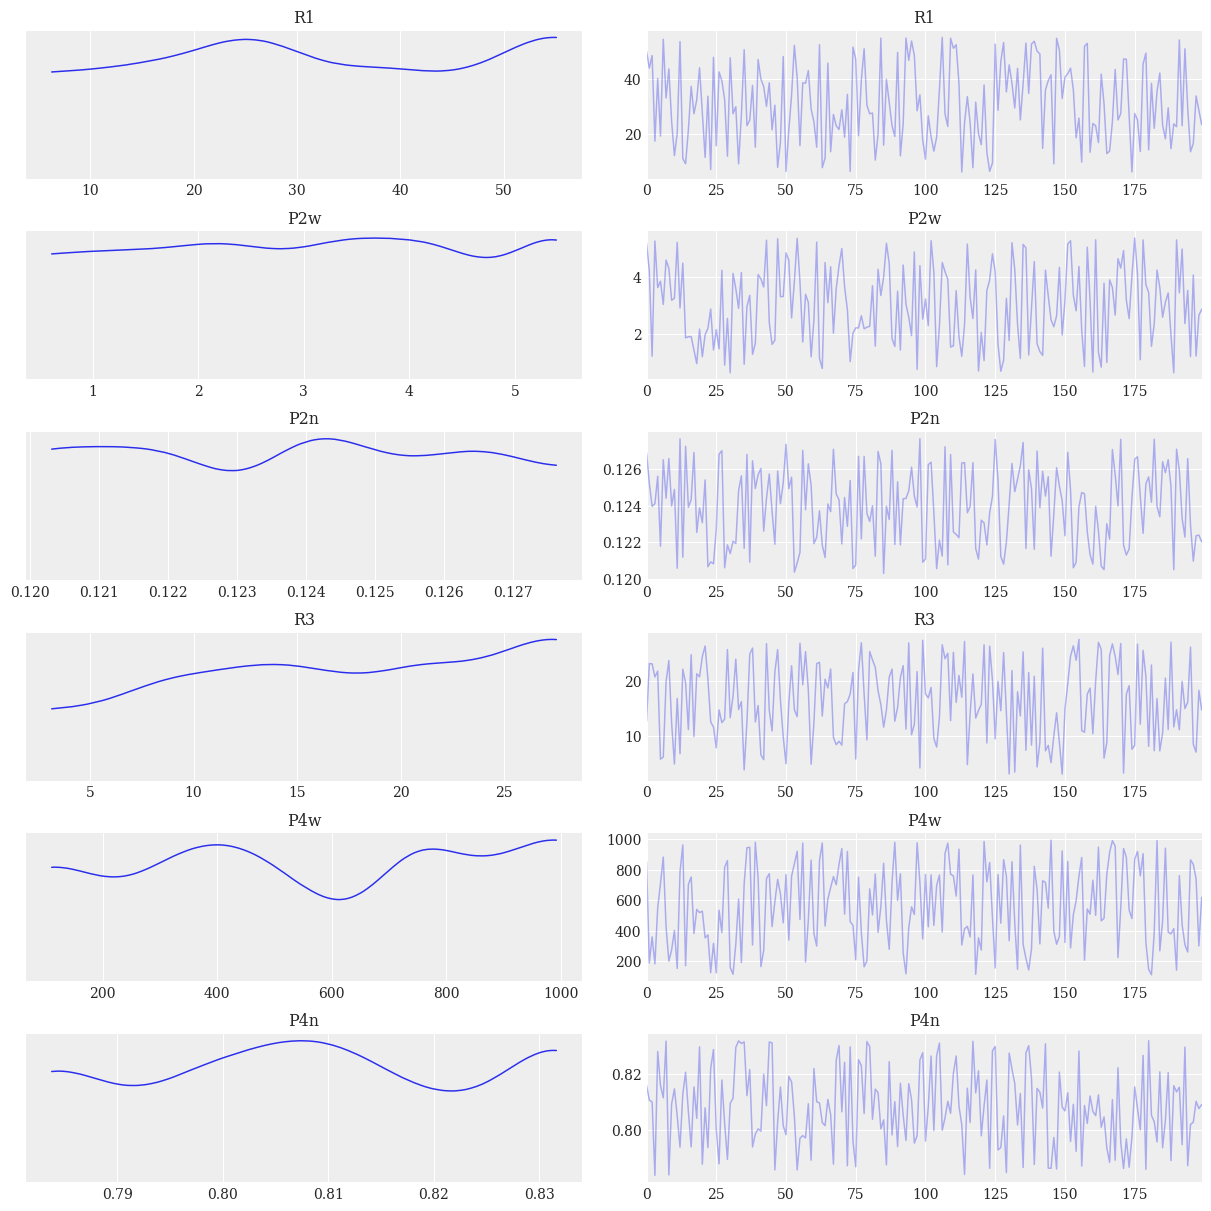

R1-P2-[R3,P4]:Prior prediction


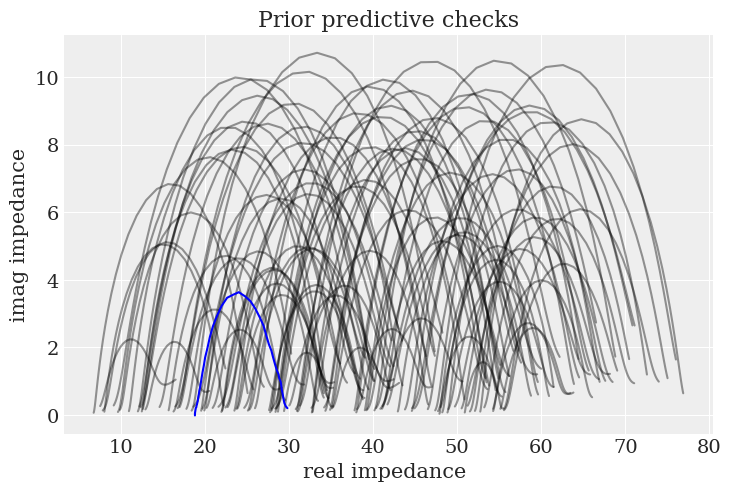

R1-P2-[R3,P4]:Posterior distributions with HDI
R1-P2-[R3,P4]:Posterior distributions with trajectories


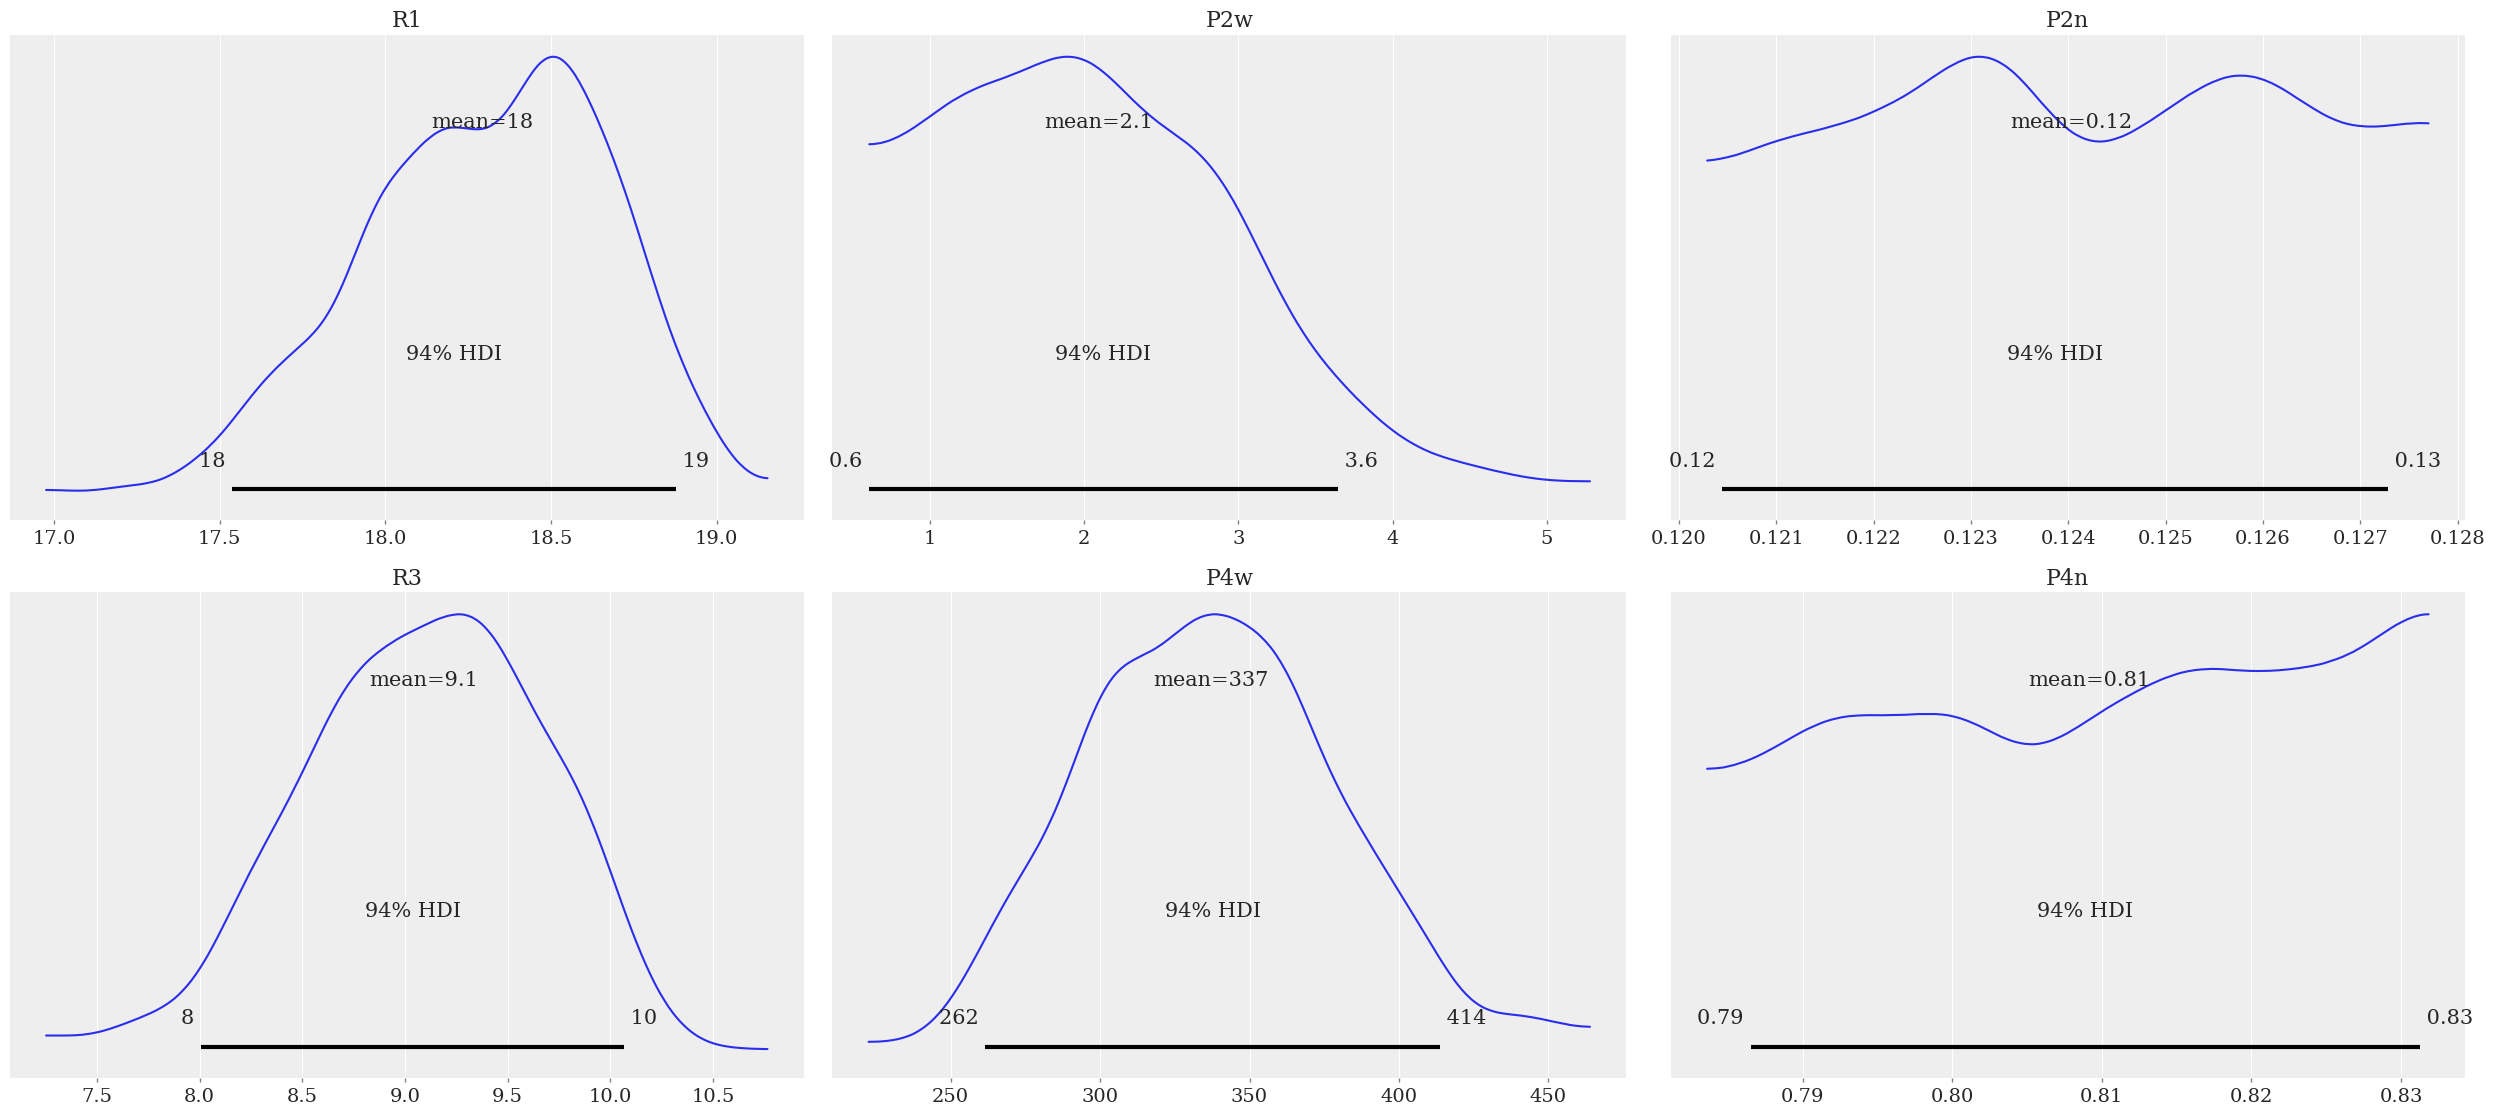

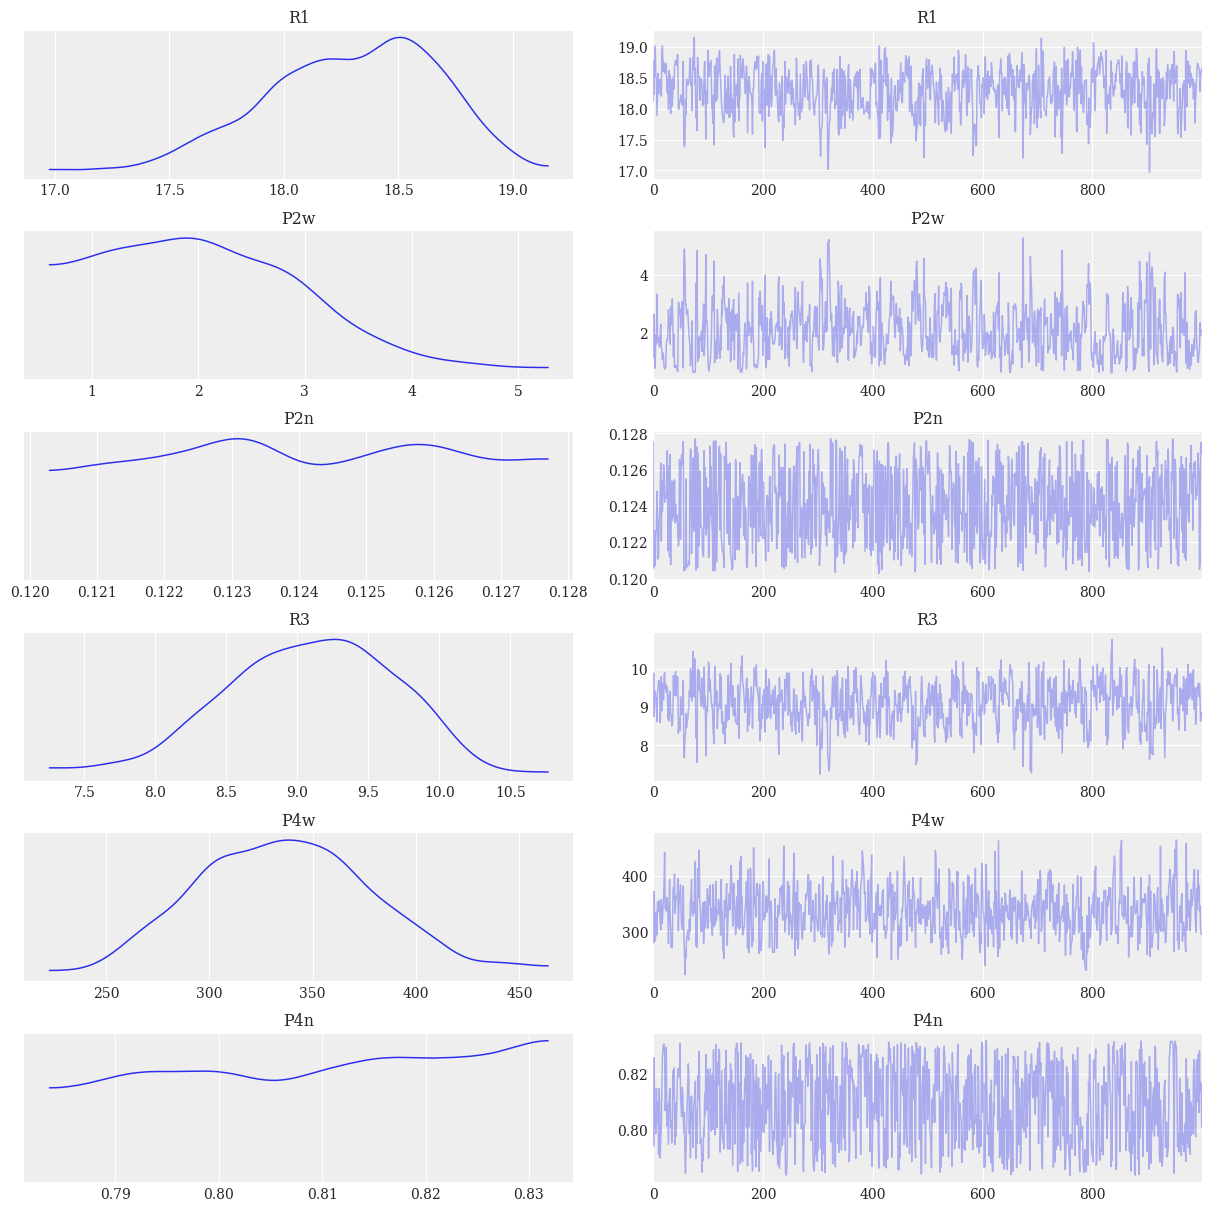

R1-P2-[R3,P4]:Posterior predictions


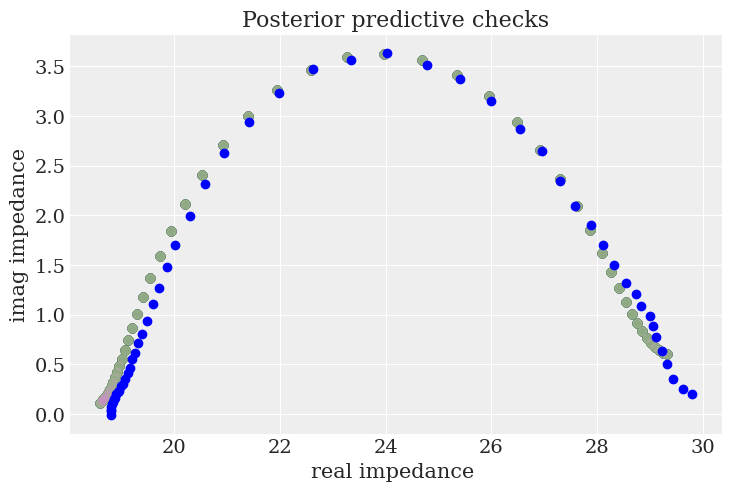

Circuit 1:[P1,R2]-R3 composed of components (['P1w', 'P1n', 'R2', 'R3']) with values ([280.9018, 0.7495, 10.5808, 18.8672])


sample: 100%|███████████████████████████| 1500/1500 [00:07<00:00, 209.50it/s, 3 steps of size 4.93e-01. acc. prob=0.92]


[P1,R2]-R3:Prior distributions with trajectories


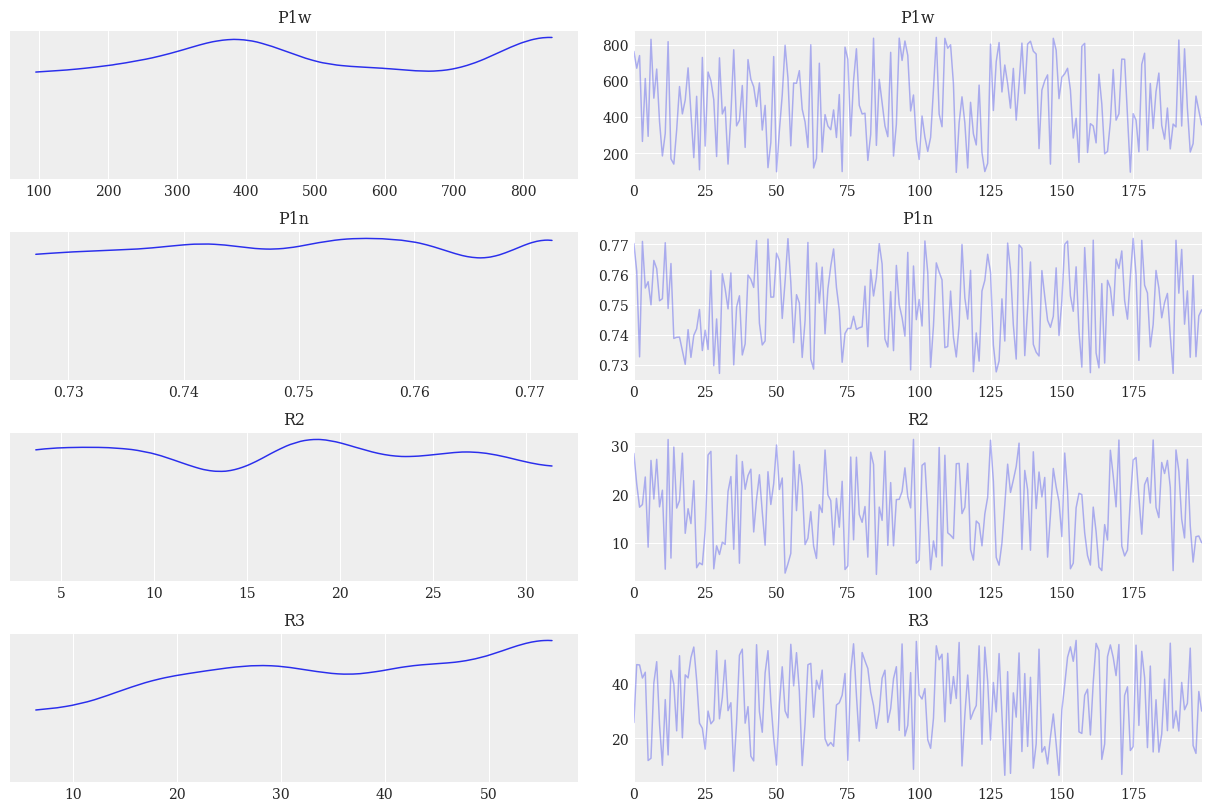

[P1,R2]-R3:Prior prediction


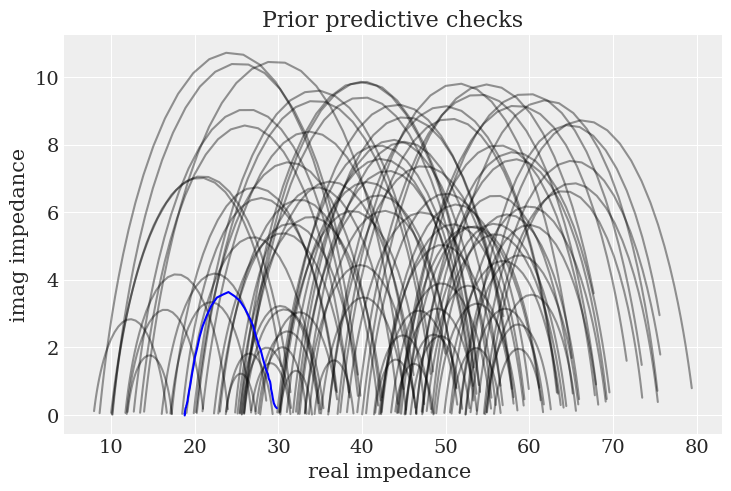

[P1,R2]-R3:Posterior distributions with HDI
[P1,R2]-R3:Posterior distributions with trajectories


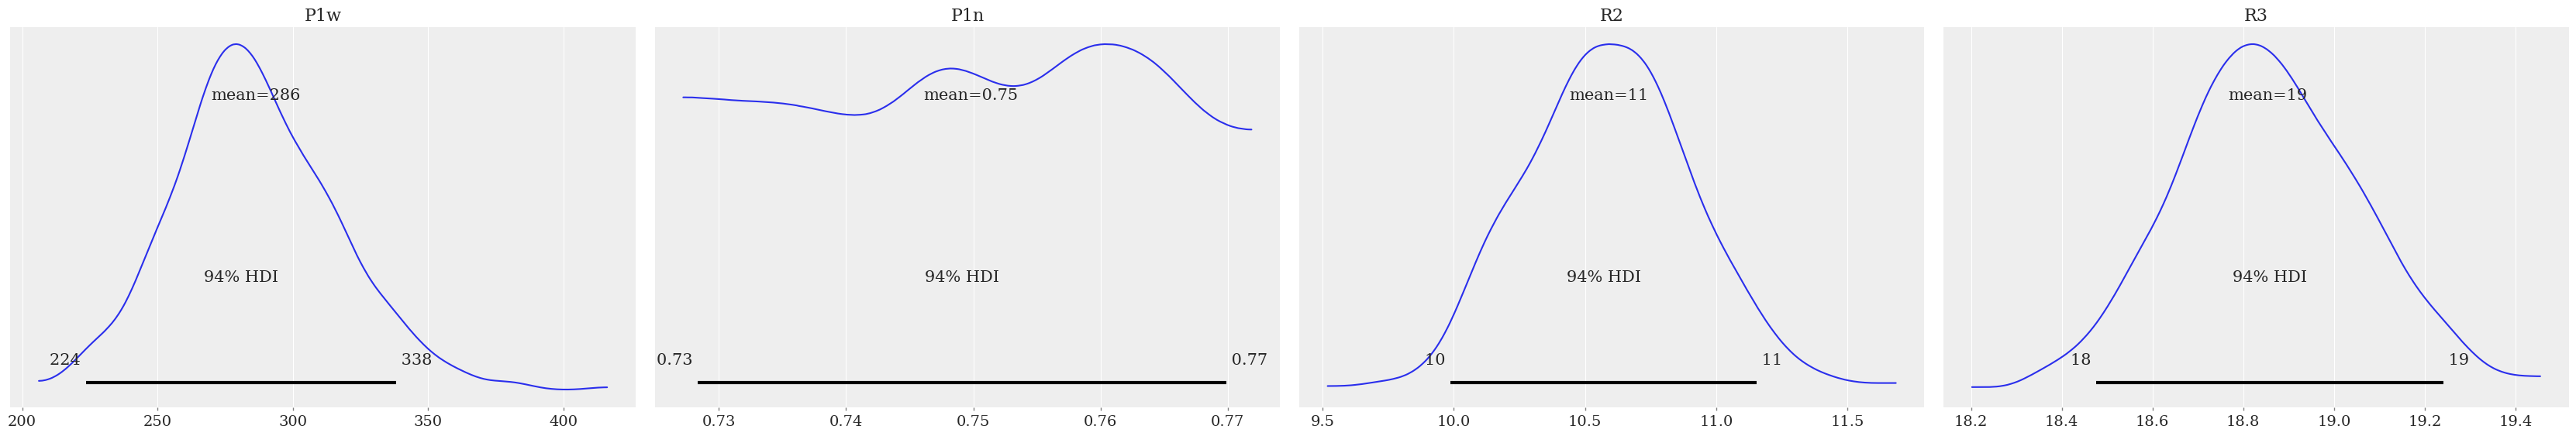

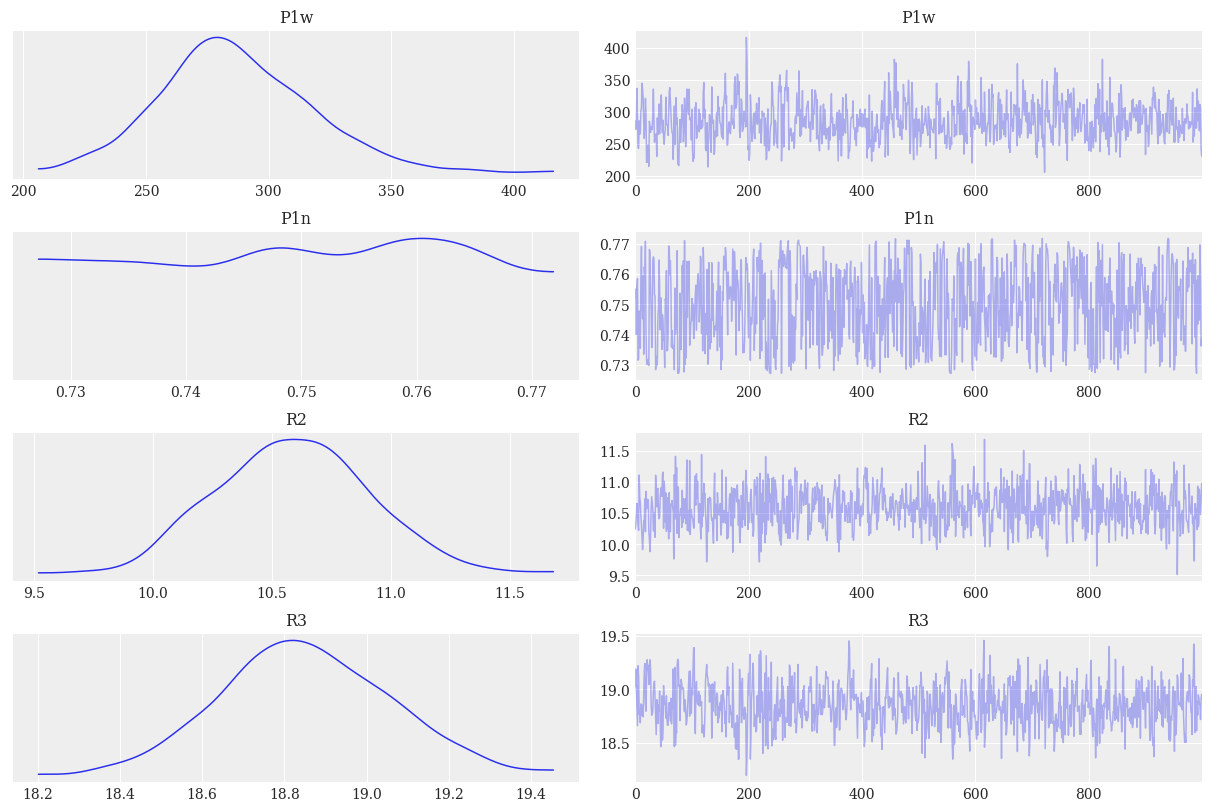

[P1,R2]-R3:Posterior predictions


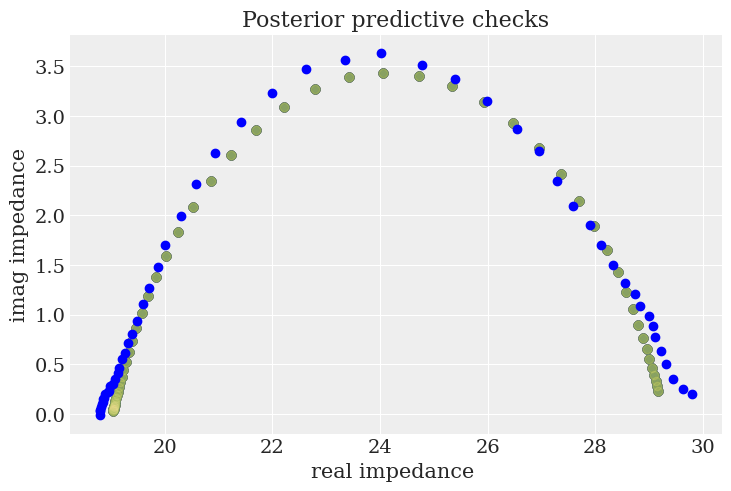

In [118]:
df_test_r = Bayesian_inference(df = df_test)

In [76]:
df_test

,Combined Circuits,Combined Values,Mathematical expressions,Counts,Different combinations,Variables_names,Variables_values,ECM Data,BI_models,BI_models_description,Priors_prediction
0,"R1-P2-[R3,P4]","[[R1 = 18.3899, P2w = 1.7986, P2n = 0.124, R3 ...",X[0]+X[1]*(2*np.pi*F)**(-X[2])*(np.cos((np.pi*...,2,1,"[R1, P2w, P2n, R3, P4w, P4n]","[18.3899, 1.7986, 0.124, 9.2603, 332.1835, 0.8...","[(18.797485-0.09957294j), (18.810656-0.1061543...",<numpyro.infer.mcmc.MCMC object at 0x00000230A...,<bound method MCMC.print_summary of <numpyro.i...,"{'P2n': [0.12687016, 0.12521285, 0.123954594, ..."
1,"[P1,R2]-R3","[[P1w = 280.9018, P1n = 0.7495, R2 = 10.5808, ...",((X[0]*(2*np.pi*F)**(-X[1])*(np.cos((np.pi*X[1...,11,1,"[P1w, P1n, R2, R3]","[280.9018, 0.7495, 10.5808, 18.8672]","[(18.881212-0.033453908j), (18.883923-0.039854...",<numpyro.infer.mcmc.MCMC object at 0x00000230B...,<bound method MCMC.print_summary of <numpyro.i...,"{'P1n': [0.7702956, 0.76111186, 0.7326448, 0.7..."


In [167]:
values,func_expression,simulated_data = convert_math()

## Visualization